# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Prediction of Insurance Price of an individual </span> </div>

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the insurance price of an individual from the given data  </span> </div>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Important: </b></p>
<p style='margin-left:1em;'>
- The tasks are given to guide the flow, Few tasks can also be considered optional if there is no scope or need.<br>
- It is always encouraged to add your options to the list or flow as additional performance is always appreciated. <br>
- Not only the results but also Visualization, Inferences, Reasons, Probabilities & Implementations are equally important. <br>
- Please make sure the conclusions for the plots, results and summaries are mentioned in your own way. Add a natural comprehension to it thinking from a real time perspective. <br>
- Its always encouraged to make this process a way of conveying a story as engaging as possible. <br>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Flow of Guided Project: </b></p>
<p style='margin-left:1em;'>
- There are certain tasks given here in order to understand and extract insights from the data. <br>
- Carefully, Go through each step and provide proper reasons and explanations for the assumptions and actions.  
</p>
</span>
</div>

## Table of Contents
* [Import necessary libraries](#Import_necessary_libraries)
* [Data loading](#Data_loading)
* [Lets Start!!](#start)
* [Data preprocessing](#Data_preprocessing)
* [Exploratory Data Analysis, Statistical Inferences and Feature Engineering](#Statistical_Inferences)
* [Assumptions](#Assumptions)
* [Evaluation metrics](#Evaluation_metrics)
* [Hyperparameter Tuning](#Hyperparameter_Tuning)
* [Build a predictive system](#Build)

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-I </p> </span> </div>

<div class="warning" style='padding:0.1em;  background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Interpretation of data: </b></p>
<p style='margin-left:1em;'>
    
* age: age of primary beneficiary <br>

* sex: insurance contractor gender, female, male <br>

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9 <br>

* children: Number of children covered by health insurance / Number of dependents <br>

* smoker: Smoking <br>

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. <br>

* charges: Individual medical costs billed by health insurance <br>
</p>
</span>
</div>

Download the dataset from here: <br>
Click here: <br>
<a href='https://drive.google.com/file/d/1SaRrBmZwxqUjpXHzCfYWo7L8ZQUpc7MX/view?usp=sharing' title='Google Drive'> Insurance data

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression




from scipy.stats import percentileofscore
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

##  <mark><span  style= "font-family: Times New Roman">Data Loading</span> </mark> <a class="anchor" id="Data_loading"></a>

In [2]:
#Importing the data into dataframe
df = pd.read_csv('insurance.csv')

##  <mark><span  style= "font-family: Times New Roman">Lets Start!!</span> </mark> <a class="anchor" id="start"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
- Using info(), Check the no of non-null values? <br>
- Also check if the data is in the convenient type. If not, change it to your convenience. <br>
- You may encode the data here itself, if you wish to!
</p>
</span>
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Checking duplicate records
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observation :**
- Good News !! No Null values as per the info.
- We got 7 features including the target feature which is *charges*.
- Although the features are in convenient datatype ,but there are some features which are categorical in nature such as *sex*,
     *smoker*,*region* so it is efficient to convert those to *categorical datatype*.
- Found 1 Duplicate Record.
- Target Feature *charges* contains outliers. 
- We'll encode the data depending on model we are going to build for prediction purpose.

##  <mark><span  style= "font-family: Times New Roman">Data preprocessing </span> </mark> <a class="anchor" id="Data_preprocessing"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- If there are any missing values encountered above: <br>
     Impute or remove the null data and provide the reason for that <br>
- Else: <br>
     Lets move ahead!!
</pre>
</p>
</span>
</div>

In [7]:
#Converting the categorical columns to categorical type
cat_col=['sex','smoker','region']
for i in  cat_col:
    df[i]=df[i].astype('category')

In [8]:
#Removing the duplicate record
df=df.drop(df[df.duplicated()].index)

##  <mark><span  style= "font-family: Times New Roman">Exploratory Data Analysis, Statistical Inferences and Feature Engineering </span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'age' first:
</pre>
</p>
</span>
</div>

In [9]:
colors = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'age group' and categorize them as following: 

    - <10 : 'Less than 10' (10 is included)
    - between 10 and 20 (10 is not included, 20 is included) : '10-20'
    - between 20 and 30 : '20-30'
    - between 30 and 40 : '30-40'
    - between 40 and 50 : '40-50'
    - between 50 and 60 : '50-60'
    - from 60 upto max (not including 60) : '>60'
    
    Use pandas.cut() for converting into bins
</pre>
</p>
</span>
</div>

- pandas.cut() is useful for creating categories for a numerical features by dividing them into categories called as ***bins***.
- It needs 3 parameters ,the column we need to categorize,bin range/intervals and labels for each category/bin.
- The edges of the bins are inclusive for the values on the right side (right-closed) bydefault , we can change this behavior using 'Right' parameter.

In [10]:
# Defining the age bins and labels
# Since there is no upper-age limit defined for 60+ age group, we can use a generalised upper-limit such as 100 or a positive infinity.
# float(inf) denotes positive infinity ,it'll include everything for 60+.

age_bins = [0, 10, 20, 30, 40, 50, 60, float("inf")]  #Intervals (0-10)
age_labels = ['Less than 10', '10-20', '20-30', '30-40', '40-50', '50-60', '>60']

#Creating new feature/column 'age_group' 
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

### Using describe(), Answer the following questions: <br>

In [11]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

**Observations :**
- Age column doesn't have any **Outliers** , as the mean-median are almost equal. 
- Minimum age we have is 18years , so basically all the people involved in the prediction are adults. 
- Category created for 0-10 years , doesn't serve any purpose with respect to given dataset.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Given for 75%, age is 51, what does that mean? 
</pre>
</p>
</span>
</div>

- This implies that 75% of the individuals in the dataset are 51 years old or younger than 51 years old.
- In *Five-Number Summary*, 75% is termed as Q3 or third quartile.
- Lets see visualization of 'age' ,to get a visual understanding of this Q3 along with other numbers.

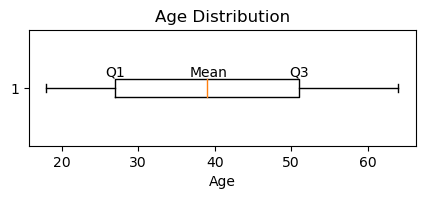

In [12]:
# Calculating quartiles and mean of age

q1 = np.percentile(df['age'], 25)    
q3 = np.percentile(df['age'], 75)     
mean_age = np.mean(df['age'])         

# Create a box plot
plt.figure(figsize=(5, 1.5))
plt.boxplot(df['age'], vert=False)
plt.title('Age Distribution')
plt.xlabel('Age')

# Add labels for Q1, Q3, and mean
plt.text(q1, 1.1, 'Q1', horizontalalignment='center')
plt.text(q3, 1.1, 'Q3', horizontalalignment='center')
plt.text(mean_age, 1.1, 'Mean', horizontalalignment='center')

plt.show()



- As we can see from the above boxplot , that under Q3/75 percentile , everyone is of age less than 51 years.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - How many people are aged above or equal to 75%?
</pre>
</p>
</span>
</div>

- People aged above or equal to 75% ,are people falling in range of 51-64(max-age).
- So we'll find out count of these people by filtering our dataset.

In [13]:
# using q3 calculated previously to filter out age.
people_above_q3=len(df[df['age']>=q3])
print(f'Number of people above 75% is : {people_above_q3}') 

Number of people above 75% is : 356


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - What count and percentile of people are aged above 45?

Note: Round your answer upto 2 digits
</pre>
</p>
</span>
</div>

- Similarly ,to find count of people ,where age>45 ,we'll apply filtering on the age using the threshold as 45years old.
- After this we'll calculate percentile for above 45 by:
    - (Number of People Above 45/Total People)*100.
    - OR by using *percentileofscore* method.

In [14]:
# Method 1 - Manual Calculation:

#Number of People age>45
people_above_45 = len(df[df['age'] > 45])  
print(f'There are {people_above_45} people above the age of 45.')

#Percentile of age>45
percentile_above_45=round((people_above_45/len(df))*100,2)
print(f'There are {percentile_above_45}% people above 45.')

There are 500 people above the age of 45.
There are 37.4% people above 45.


In [15]:
# Using inbuilt function:
# Generally Percentile is used for less than ,for example 75% represented less than 51 years old .

percentile_below_45 = percentileofscore(df['age'], 45) #percentage of people less than age 45
percentile__above_45=(100-percentile_below_45).round(2)
print(f'There are {percentile__above_45}% people above 45.')

There are 38.44% people above 45.


- There can be differences in how percentiles are calculated based on the method used. 
- Different algorithms and libraries might use slightly different methods to handle rounding, continuity corrections, 
    and edge cases, leading to small discrepancies in percentile values.
    

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Which group of people has highest amount of smokers?
</pre>
</p>
</span>
</div>

In [16]:
# Filtering rows where 'smoker' is 'yes'
smoker_yes_df = df[df['smoker'] == 'yes']

# Group by 'age_group' column for 'yes' values in 'smoker' column
#Selecting the first  age_group with highest count of smokers.
smoker_yes_df.groupby('age_group').size().sort_values(ascending=False).head(1)

age_group
40-50    61
dtype: int64

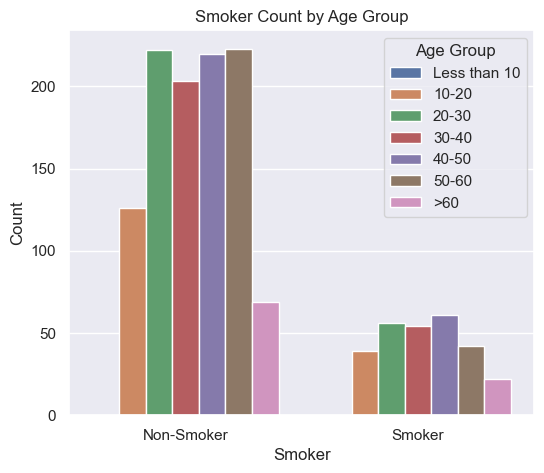

In [17]:
# Visualizing the smokers counts in different age_group.
sns.set(style="darkgrid")

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='smoker', hue='age_group')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Count by Age Group')
plt.legend(title='Age Group', title_fontsize='12', loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()


- People between the age group of **40-50** ,contains most smokers.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Sample plot: </b></p>
<p style='margin-left:1em;'>
<pre> - Using sns.countplot() and plt.pie(), plot a count plot and pie plot for age group.
</pre>
</p>
</span>
</div>

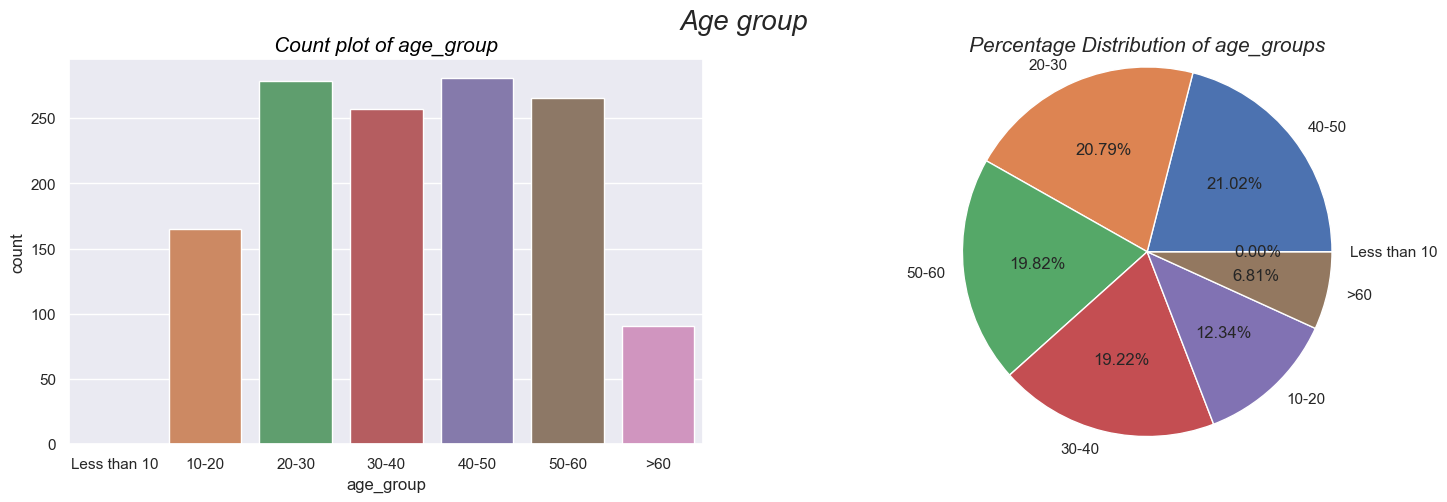

In [18]:
column = 'age_group'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Age group',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Percentage Distribution of {}s'.format(column),fontsize=15,fontstyle='italic')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
- Observe the above plot and format given, Now..
- Define a function giving input as column name such as def plot_data(column_name):
- In that, 
- Using sns.histplot(), sns.distplot(), sns.boxplot() plot the histogram plot, distribution plot and box plot for the age feature

### Use the below code for histogram and distribution plot.
Hint: 
sns.histplot(ax=axes[0],x=column,data=df,color=colors[1])
axes[0].set_title('Histogram of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=colors)
axes[1].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
plt.text(.95,.95,'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
        df[column].var(),df[column].skew(),df[column].kurtosis()),ha='right', va='top', transform=axes[1].transAxes)

Try to write the code for box plot as third subplot as shown above.

Image is given below!!
</pre>
</p>
</span>
</div>

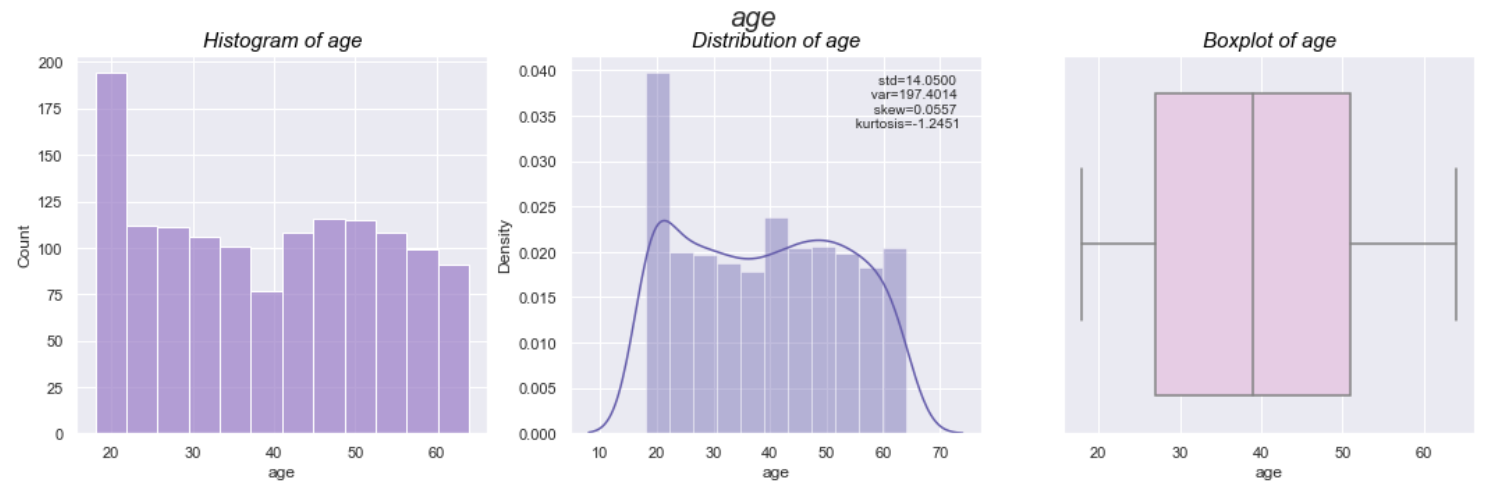

In [19]:
#Defining a function to plot histogram,distribution plot and boxplot.

def plot_data(column_name):
    fig,axes = plt.subplots(1,3,figsize=(18,5))  # 3 plots in 1 row
    fig.suptitle(f'{column_name}'.upper(),fontsize=20,fontstyle='oblique')
    
    sns.set_style("dark")
    
    sns.histplot(ax=axes[0],x=column_name,data=df,color=colors[1])
    axes[0].set_title('Histogram of {}'.format(column_name),fontstyle='italic',fontsize=15,color='black')
    
    sns.distplot(ax=axes[1],x=df[column_name],axlabel=column_name,color=colors[0])
    axes[1].set_title('Distribution of {}'.format(column_name),fontstyle='italic',fontsize=15,color='black')
    
    sns.boxplot(ax=axes[2],x=column_name,data=df,color=colors[3])
    axes[2].set_title('Boxplot of {}'.format(column_name),fontstyle='italic',fontsize=15,color='black')
    
    plt.text(.95, .95, 'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(
    df[column_name].std(), df[column_name].var(), df[column_name].skew(), df[column_name].kurtosis()),
    ha='right', va='top', transform=axes[1].transAxes)



    
    plt.show()


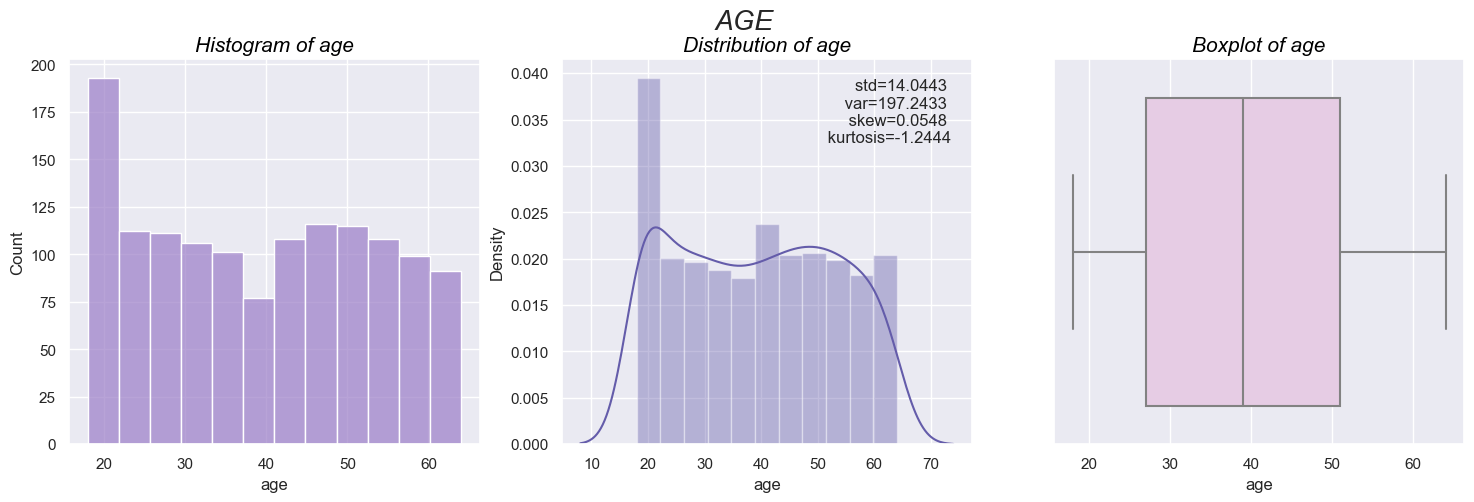

In [20]:
plot_data('age')

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
For a chosen random variable, find the probability that:
    1. the person has age 43
    2. the person is from group 40-45 (both inclusive)
    3. has age greater than 45
   Plot the distribution plot for second one using seaborn - sns.distplot()
   To plot distribution plot for the second one, you need to encode the feature. 
   So, using LabelEncoder(), Encode the features and assign them in a seperate feature named 'age grp encode'.   
Note: Round off to two digits
What kind of distribution is it? 
</pre>
</p>
</span>
</div>

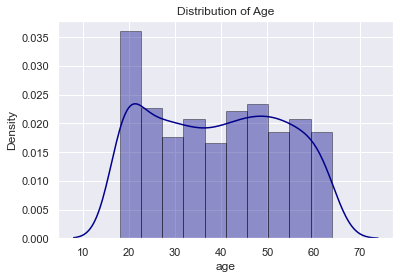

In [21]:
#Probability of age 43 
probability_age_43 = round(len(df[df['age'] == 43]) / len(df),2)
print(f'The probability that the person has age 43 is : {probability_age_43}')

The probability that the person has age 43 is : 0.02


In [22]:
# Probability of age in 40-45 group
probability_age_40_45 =round( len(df[(df['age'] >= 40) & (df['age'] <= 45)]) / len(df),2)
print(f'The probability that the person has age between 40-45 is : {probability_age_40_45}')

The probability that the person has age between 40-45 is : 0.12


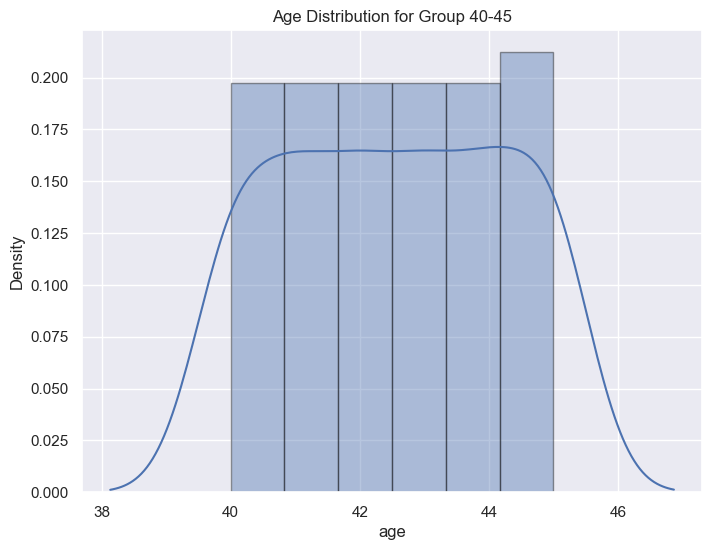

In [23]:
#Distribution plot for age group of 40-45
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.distplot(df[(df['age']>=40) &  (df['age']<=45)]['age'], bins=6, kde=True, hist_kws={'edgecolor':'black'})
plt.title('Age Distribution for Group 40-45')
plt.show()

**Observations :**
- It is uniform distribution.

In [24]:
#Probability of greater than 45
probability_age_greater_than_45 = round(len(df[df['age'] > 45]) / len(df),2)
print(f'The probability that the person has age greater than 45 is : {probability_age_greater_than_45}')

The probability that the person has age greater than 45 is : 0.37


**Observations :**
- As we are increasing the range of population under observation ,the probability is also increasing for the given continuous variables.



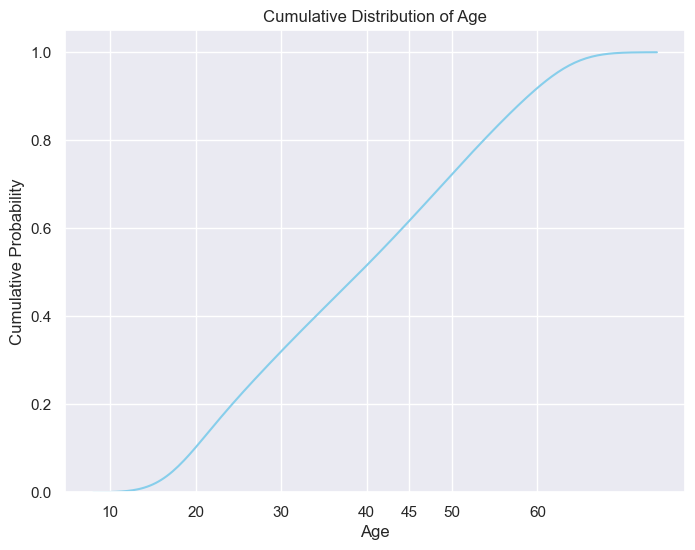

In [25]:
#Visualizing the probability of age>45
# Create a cumulative distribution plot for the 'age' column
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['age'], cumulative=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Age')

x_ticks = [10, 20, 30, 40,45, 50, 60]  # Define the custom x-axis tick locations
x_labels = ['10', '20', '30', '40','45', '50', '60']  # Define the labels for the custom tick locations

plt.xticks(x_ticks, x_labels)

plt.show()


In [26]:
#Encoding the age_group column 

encoder = LabelEncoder()
df['age_grp_encode'] = encoder.fit_transform(df['age_group'])

#### **Relationship of Age with Charges :**

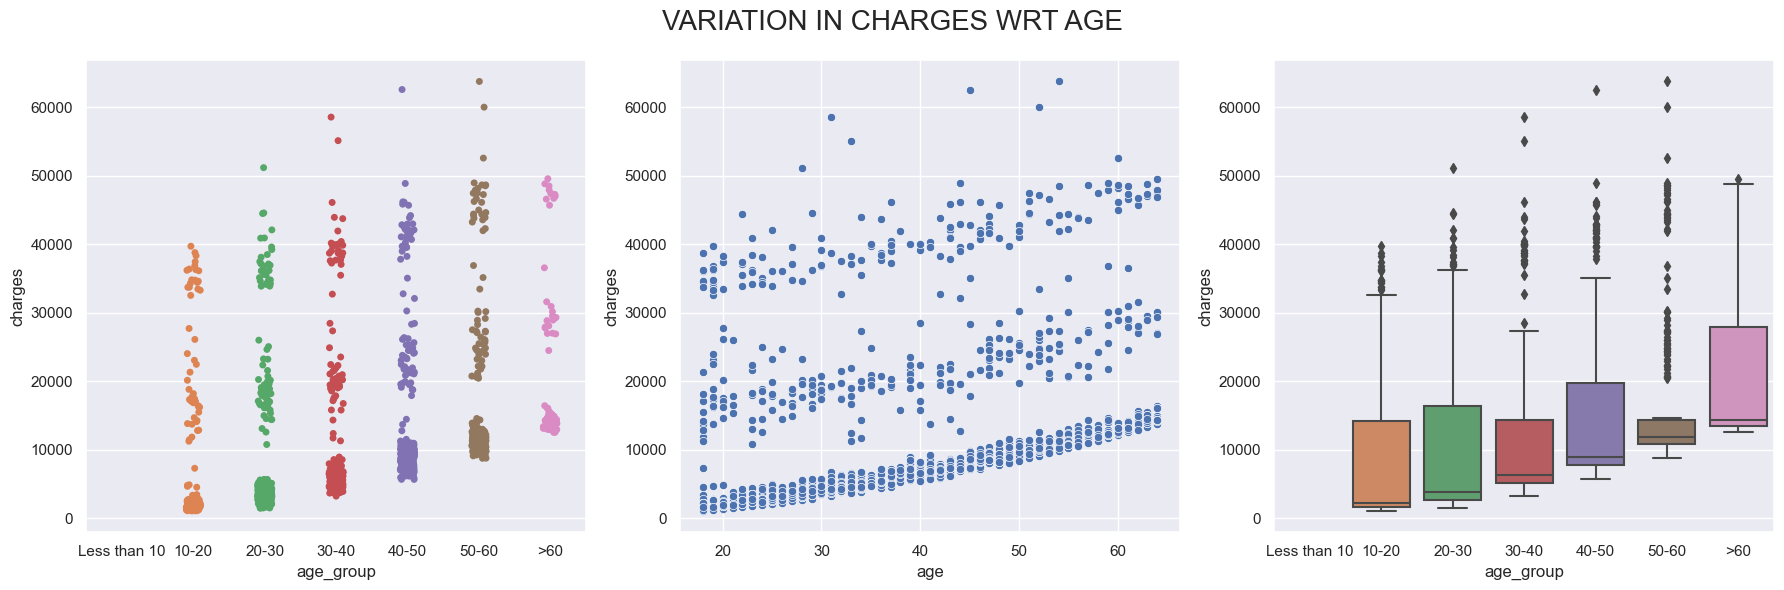

In [27]:

fig,axes = plt.subplots(1,3,figsize=(18,6))
fig.suptitle('Variation in Charges wrt Age'.upper(),fontsize=20)

sns.stripplot(data=df,x='age_group',y='charges',ax=axes[0]);
sns.scatterplot(data=df,x='age',y='charges',ax=axes[1]);
sns.boxplot(data=df,ax=axes[2],y='charges',x='age_group')

plt.tight_layout()
plt.show()

**Observations :**
- For Same age group there is range of Insurance Prices :
    - For Age 10-20 ,range varying from 0 to 40000
    - For 20-30,it is varying from approximately 0 to 50000
- This is implying that ,there are either **Outliers** in charges column(*refer to boxplot*) , or there are some factors which increases the Insurance Price . 

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'sex' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'sex' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

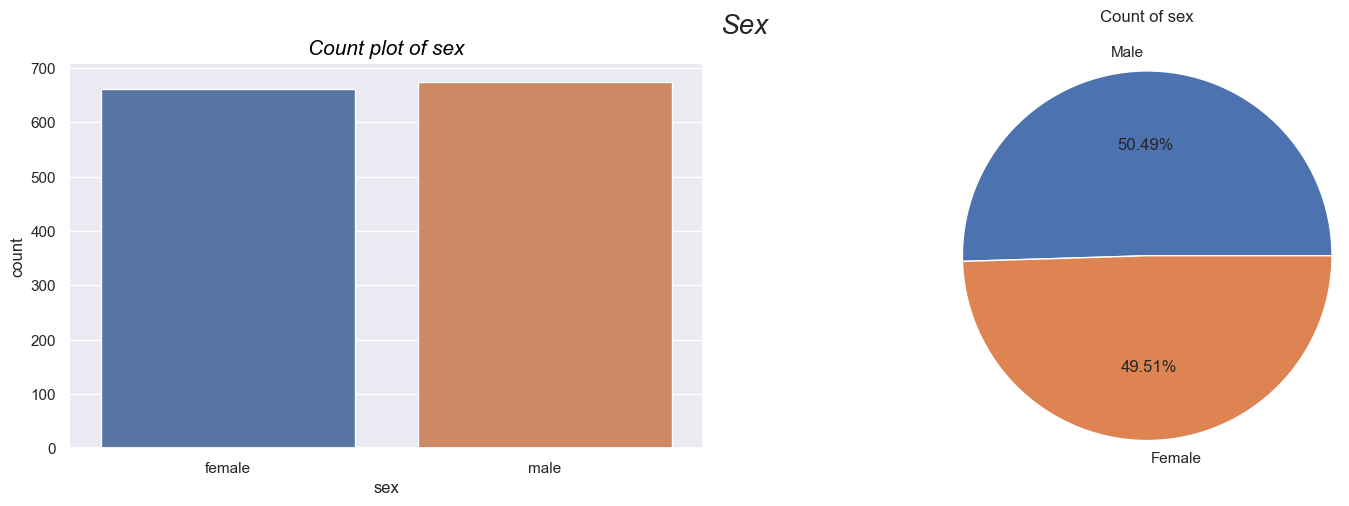

In [28]:
column = 'sex'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Sex',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts(),labels=['Male','Female'],radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}'.format(column),pad=30)
plt.show()

**Observations :**
- Dataset is balanced with respect to gender representation ,both genders have approximately equal datapoints.
- The dataset provides a reasonable representation of both genders, making it suitable for gender-based analysis. Any analysis or insights derived from this dataset can be generalized to both males and females.
- It could be valuable to investigate, how gender correlates with insurance charges.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot with respect to smokers feature as subplots as shown for age feature. Draw your inferences
- Which pair of categories share the highest percentage? 
- Hint hue or value_counts() function to plot. 
</pre>
</p>
</span>
</div>

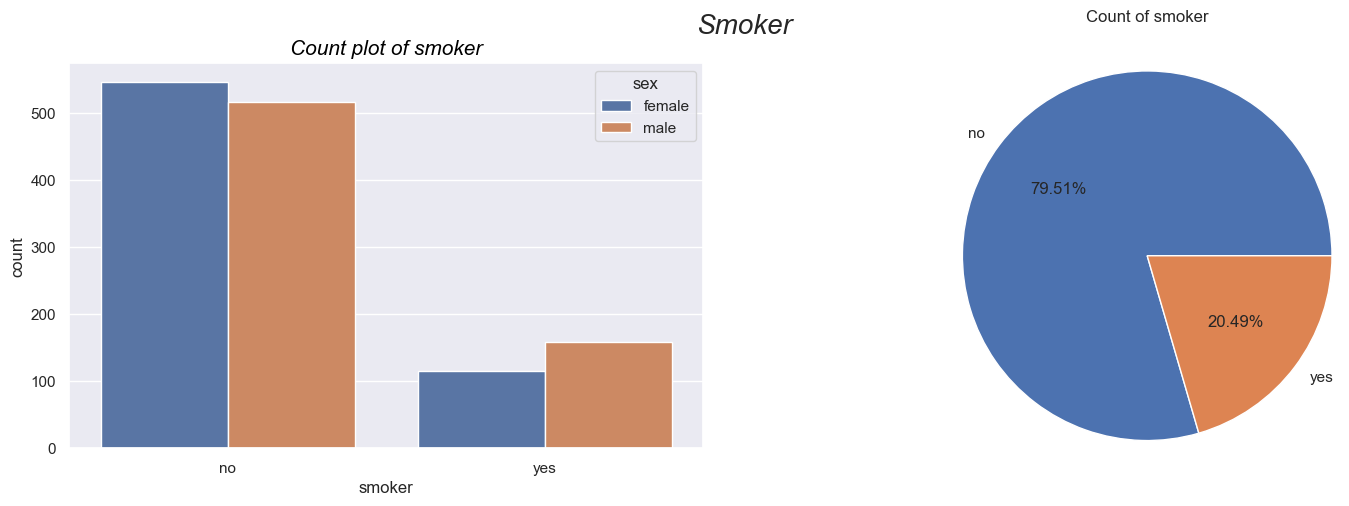

In [29]:
column = 'smoker'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Smoker',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df,hue='sex')
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}'.format(column),pad=30)
plt.show()

**Observation :**
- Majority of people are in *NO-SMOKING* category 
    - 79.52% people are not smokers ,and share the highest percentage.
    

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
It is claimed that There are almost equal smokers in men and women. Find out if its true?
Note: Encode the data before using it for statistical tests
</pre>
</p>
</span>
</div>

- Above Countplot is showing ,for the given sample that both genders doesn't share almost equal percentage ,when it comes to smoking. 
- For checking this fact with respect to population ,we have to run some statistical test.
- Or in other words ,to generalise the fact that "There are almost equal smokers in men and women", we can use CHI-SQUARE test.
- **CHI-Square test** will be used to check if there is a significant difference in the proportions of smokers between men and women or not .
    - chi-squared test for independence is used to determine if there is a significant association between two categorical variables.

In [30]:
# Encoding sex Column
df['sex_encoded'] =pd.get_dummies(df['sex'], drop_first=True)

# Encoding smoker column
df['smoker_encoded'] = pd.get_dummies(df['smoker'],drop_first=True)

In [31]:
# Creating Contingency Table between Sex and Smoker
contingency_table = pd.crosstab(df['sex_encoded'], df['smoker_encoded'],margins=True, margins_name='Total')

In [32]:
contingency_table

smoker_encoded,0,1,Total
sex_encoded,,,
0,547,115,662
1,516,159,675
Total,1063,274,1337


In [33]:
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant relationship between gender and smoking status.")
else:
    print("There is no significant relationship between gender and smoking status.")

Chi-square statistic: 7.844077785733106
P-value: 0.0974597273540739
There is no significant relationship between gender and smoking status.


**Conclusion :**
- Smoking Habit is independent of the Gender. 
- So we can't say that *There are almost equal smokers in men and women*.


<AxesSubplot:xlabel='charges', ylabel='Count'>

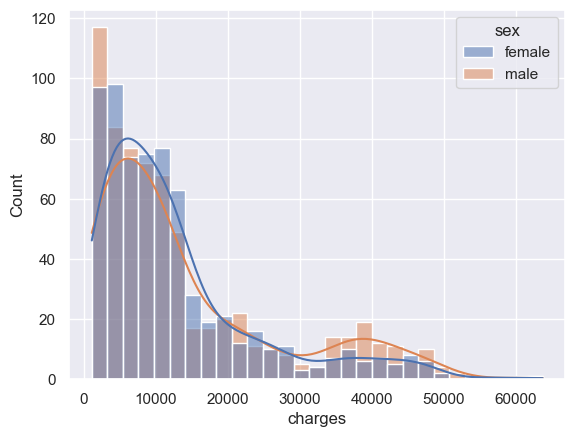

In [34]:
#Distibution of Male and Female against charges
sns.histplot(df, x='charges', kde=True, hue='sex')

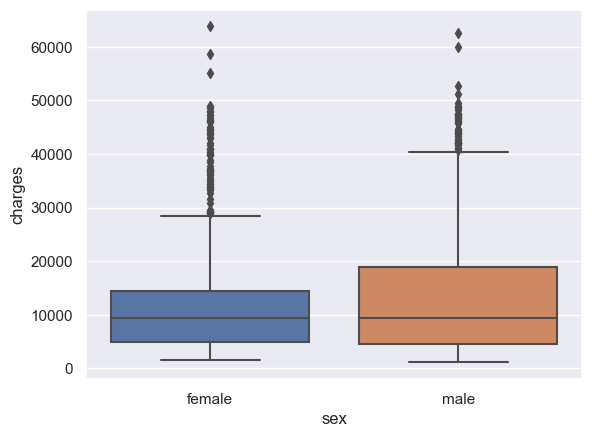

In [35]:

sns.boxplot(data=df,x='sex',y='charges');

**Conclusion :**
- Sex doesn't seem to be very distinguising feature for prediction of Insurance Prices.
- So while modelling we can remove it.

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'smoker' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'smoker' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

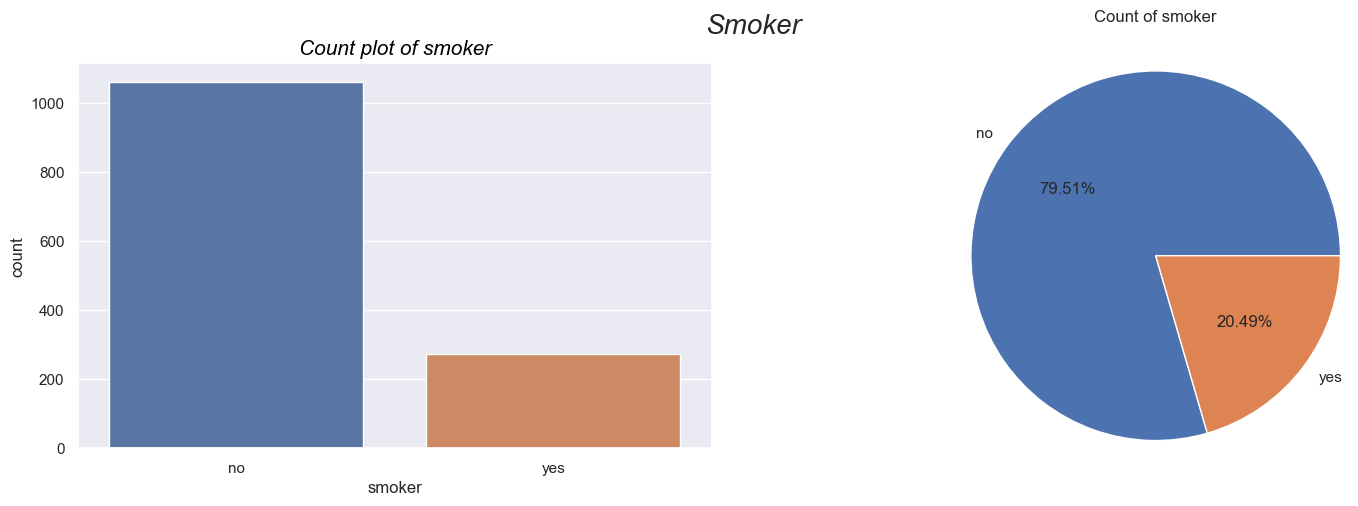

In [36]:
column = 'smoker'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Smoker',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}'.format(column),pad=30)
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

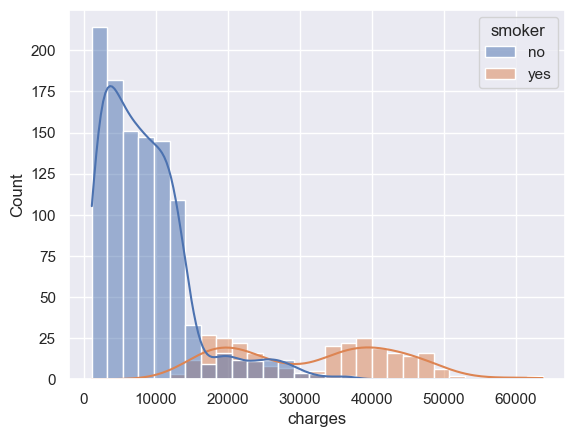

In [37]:
sns.histplot(df, x='charges', kde=True, hue='smoker')

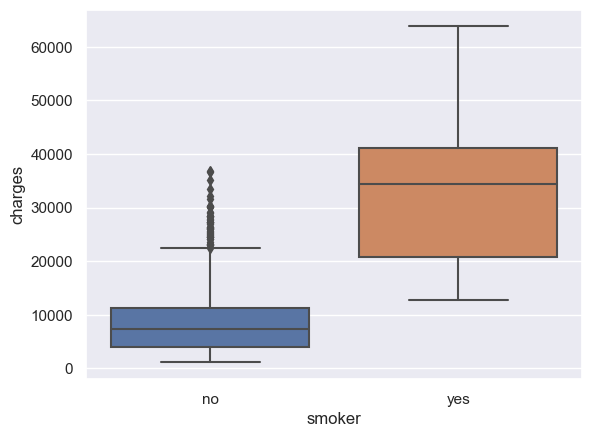

In [38]:
sns.boxplot(data=df,x='smoker',y='charges');

- Claim for non smoker is lesser than smokers.
- Most Claims of non smokers lies in range 0-15000, and Smoker's claims are greater than 15000
- Non-Smoker category contains Outliers.
- Need to study this feature more with other features, to find out more info about Outliers of Non-Smokers.
- Also 'Smoker' seems to create a distinction between high and low charges,so it is useful in prediction of charges.

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'bmi' first:
</pre>
</p>
</span>
</div>

<AxesSubplot:>

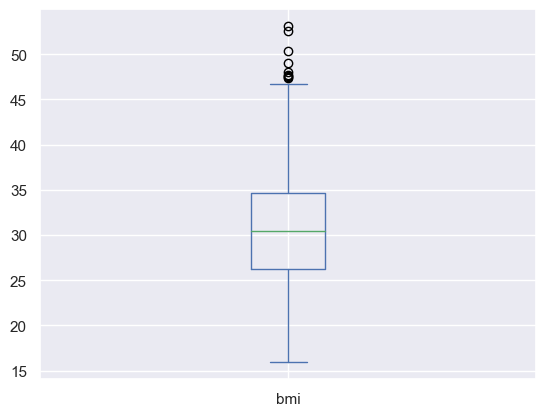

In [39]:
df['bmi'].plot(kind='box')

In [40]:
q1=np.percentile(df['bmi'],25)
q3=np.percentile(df['bmi'],75)
iqr=q3-q1
ub=q3+iqr*1.5

In [41]:
#Saving the outliers to treat it later.
bmi_outliers=df[df['bmi']>ub]

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'BMI group' and categorize them as following: <br>
    - < 18.5 : 'Under weight'
    - 18.5 - 25 : 'Healthy weight' 
    - 25 - 30 : 'Overweight'
    - 30 - 40 : 'Obese'
    - >=40 : 'Severely Obese'
</pre>
</p>
</span>
</div>

In [42]:
#Categories for BMI 
bmi_bins=[0,18.5,25,30,40,float('inf')]
bmi_labels=['Under_weight','Healthy_weight','Overweight','Obese','Severely_Obese']

df['BMI_group']=pd.cut(df['bmi'],bins=bmi_bins,labels=bmi_labels,right=False)

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plot for the bmi feature
</pre>
</p>
</span>
</div>

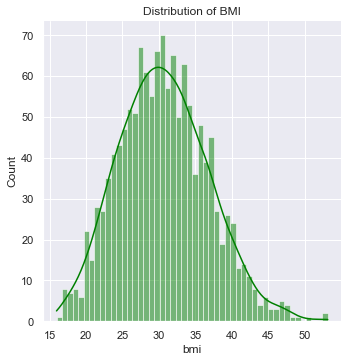

Text(0.5, 1.0, 'Distribution of BMI')

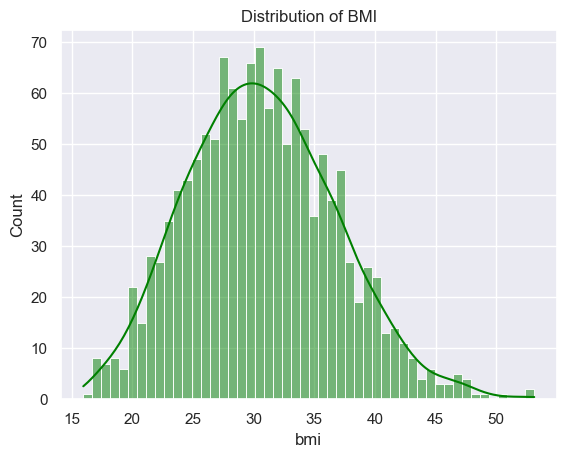

In [43]:
#Distribution of BMI
sns.set_style("darkgrid")
sns.histplot(data=df,x='bmi',bins=50,color='green',kde=True)
plt.title('Distribution of BMI')



<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Do obese people have to pay high insurance price? Please perform a statistical test suitable to this and give your opinion on this? 
- Note: You can choose either 'BMI' or 'BMI group' for this. Choose the test accordingly. 
You can also encode 'BMI group feature' and perform the above needed one.
</pre>
</p>
</span>
</div>

- **We'll use *ANOVA Test* to see if there is significant difference in the insurance prices on the basis of obesity.**
- For this we'll use *BMI group* feature to find out the difference with respect to insurance price.

In [44]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

- Clearly there are outliers in 'charges' column .

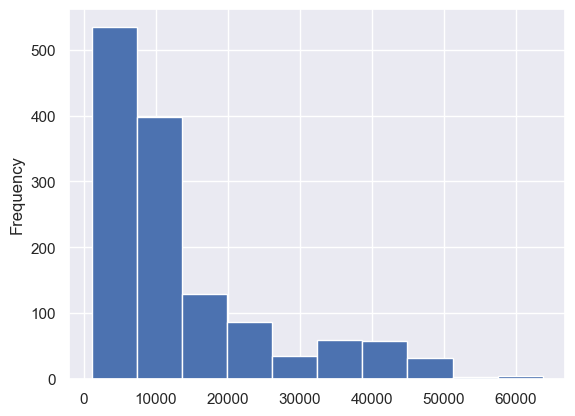

In [45]:
#Checking the distribution of 'charges' column ,to ensure Normalcy for running ANOVA test
df['charges'].plot(kind='hist');

- Insurance Prices are right skewed ,showing presence of outliers.
- Before giving this to ANOVA ,lets normalise it use BOXCOX transformer.

In [46]:
#Applying log transformation to Normalize the target feature
df['normal_charges']=np.log(df['charges'])

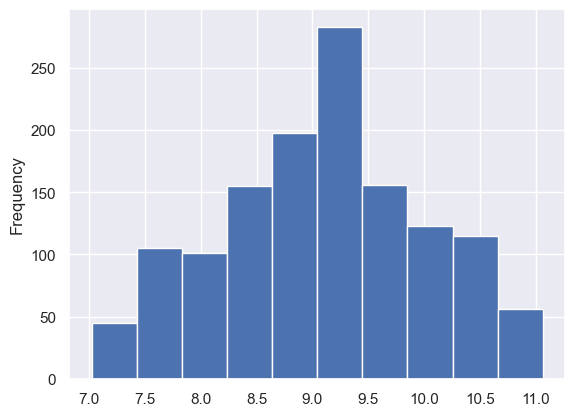

In [47]:
#Normalized distirbution
df['normal_charges'].plot(kind='hist');

In [48]:
df['normal_charges'].describe()

count    1337.000000
mean        9.099928
std         0.918699
min         7.022756
25%         8.465130
50%         9.146992
75%         9.720629
max        11.063045
Name: normal_charges, dtype: float64

In [49]:
#Anova test to find out the difference among various BMI groups.
model = ols('normal_charges ~ BMI_group', data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

p_value = anova_result['PR(>F)']['BMI_group']

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("\nReject the null hypothesis. \nThere is sufficient evidence to conclude that there are differences in mean normal charges among BMI groups.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that there are differences in mean normal charges among BMI groups.")

                sum_sq      df         F    PR(>F)
BMI_group    19.213924     4.0  5.772604  0.000132
Residual   1108.379660  1332.0       NaN       NaN

Reject the null hypothesis. 
There is sufficient evidence to conclude that there are differences in mean normal charges among BMI groups.


**Observation :**
- Smaller p-value*(less than 0.05)* implying that there is significant different in mean i.e there is difference in Insurance Price among the BMI groups.
- We can perform some post-hoc test to see which group is different from others.

In [50]:
tukey = pairwise_tukeyhsd(endog=df['normal_charges'], groups=df['BMI_group'], alpha=0.05) 
pd.DataFrame(tukey.summary())  

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,Healthy_weight,Obese,0.2627,0.0021,0.0686,0.4568,True
2,Healthy_weight,Overweight,0.0764,0.856,-0.1326,0.2854,False
3,Healthy_weight,Severely_Obese,0.288,0.0824,-0.0216,0.5975,False
4,Healthy_weight,Under_weight,-0.213,0.8551,-0.7944,0.3684,False
5,Obese,Overweight,-0.1863,0.0146,-0.3481,-0.0245,True
6,Obese,Severely_Obese,0.0253,0.9992,-0.2546,0.3051,False
7,Obese,Under_weight,-0.4757,0.1471,-1.0418,0.0905,False
8,Overweight,Severely_Obese,0.2116,0.2713,-0.0788,0.5019,False
9,Overweight,Under_weight,-0.2894,0.6385,-0.8608,0.282,False


**Observation :**
- Generally **Obese** group mean is different from other group with some exceptions.
    - Obese and Severly obese group mean is not different ,as they are close category.
    - But Obese and Underweight ,totally opposite categories ,have no difference ,which is surprising.
- Which mean charges are getting affected with Obesity ,but there can be other factors also which combines with BMI to ,decide charges.
- This signifies that BMI is an important feature for prediction of Insurance Prices.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Visualize the above scenario using a plot. How do you visualize it in the most informative way? 
</pre>
</p>
</span>
</div>

- To visualize above scenario , we can use 2 group of plots
    - 1st group with full data
    - 2nd group after filtering out high BMI people.


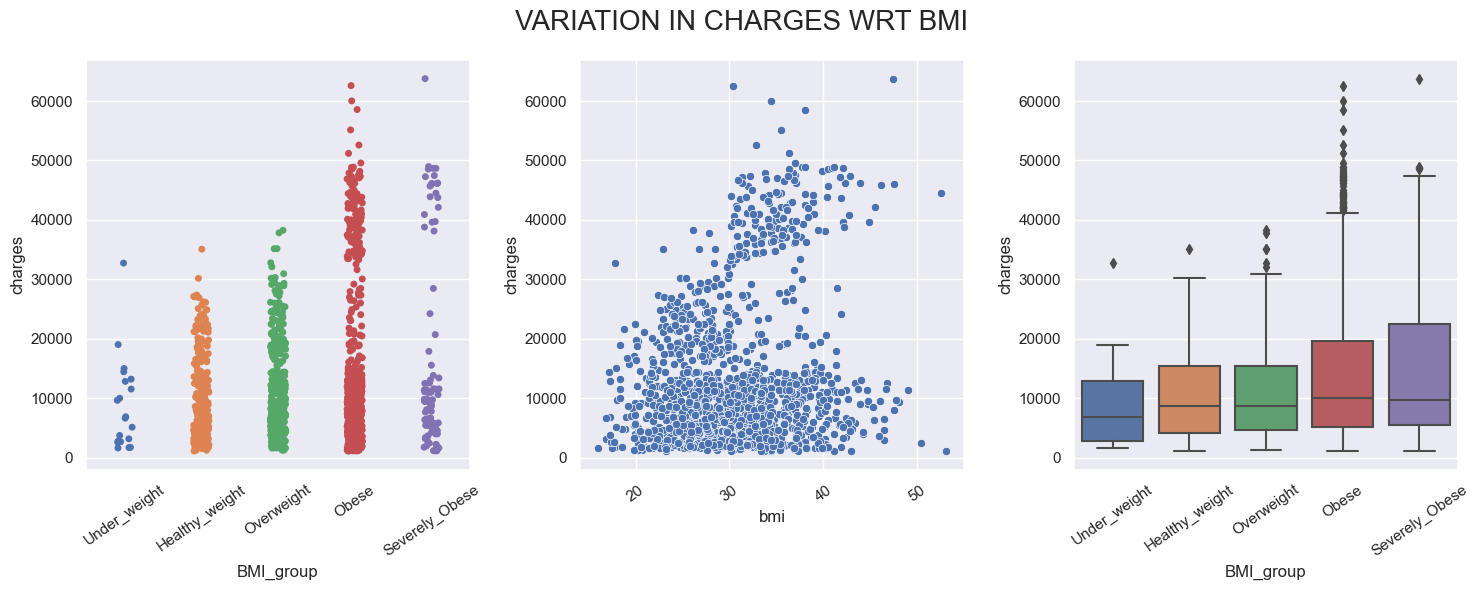

In [51]:
#Plotting a stripplot to see the most densely region for charges among different groups
#Scatterplot to see the linear relationship
#Boxplot to see the outlier range for all categories

fig,axes = plt.subplots(1,3,figsize=(15,6))
fig.suptitle('Variation in Charges wrt BMI'.upper(),fontsize=20)


for ax in axes:
    ax.tick_params(axis='x', rotation=35)

sns.stripplot(data=df,x='BMI_group',y='charges',ax=axes[0]);
sns.scatterplot(data=df,x='bmi',y='charges',ax=axes[1]);
sns.boxplot(data=df,ax=axes[2],y='charges',x='BMI_group')



plt.tight_layout()
plt.show()

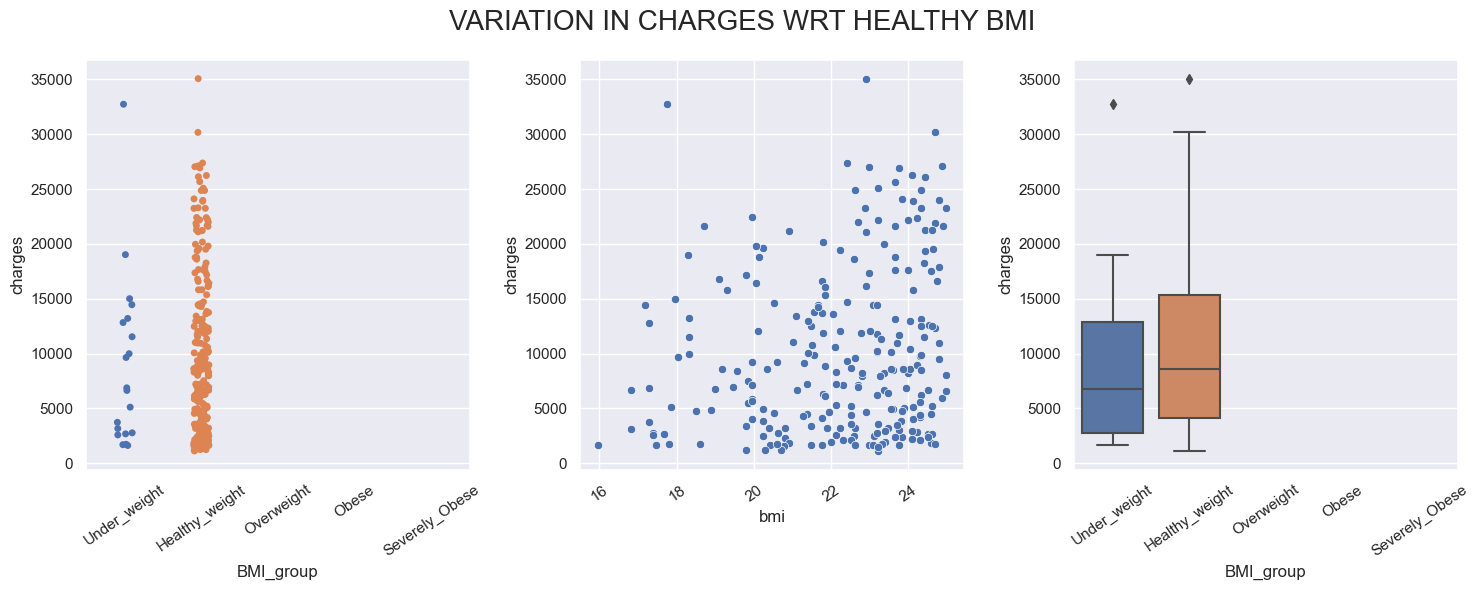

In [52]:
#Filtering out healthy BMI people to see the difference
age_bmi=df[(df['bmi']<25)]
fig,axes = plt.subplots(1,3,figsize=(15,6))
fig.suptitle('Variation in Charges wrt Healthy BMI'.upper(),fontsize=20)

for ax in axes:
    ax.tick_params(axis='x', rotation=35)
    

sns.stripplot(data=age_bmi,x='BMI_group',y='charges',ax=axes[0]);
sns.scatterplot(data=age_bmi,x='bmi',y='charges',ax=axes[1]);
sns.boxplot(data=age_bmi,ax=axes[2],y='charges',x='BMI_group')

plt.tight_layout()

- **Obese people are paying very high price as compared to other categories.(refer to the boxplot and stripplot)**
- Overall if we can see, BMI is affecting the claims , if we can see the plots y scale , the range of charges just comes down to half after filtering out people above 25 BMI.
- Stripplot is showing the most of the people under 25 BMI are paying less than 15000.
- Still there are people ,under 25 BMI who are paying high price ,so there can be other factors along with BMI which affects Charges, as we saw previously Smoking is one of the affecting factor.
- Analysing BMI with SMokers will give a good insight.
- Overall , we can say that **BMI** is also an important feature for prediction.


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'children' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'children' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

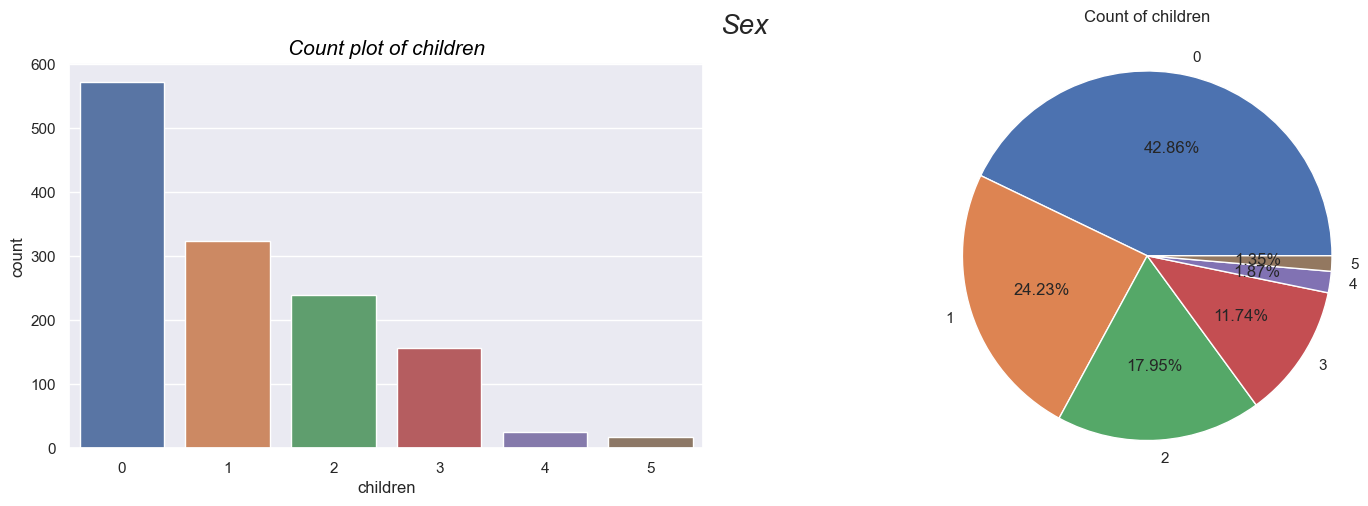

In [53]:
column = 'children'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Sex',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}'.format(column),pad=30)
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is count and percentage of people having more than 2 children?
Note: Round the percentage to 2 digits
</pre>
</p>
</span>
</div>

In [54]:

print(f'Count of people having more than 2 children is : {len(df[df["children"] > 2])}')


Count of people having more than 2 children is : 200


In [55]:
print(f'Percentage of people having more than 2 children : {round(len(df[df["children"]>2])/len(df)*100,2)}%')

Percentage of people having more than 2 children : 14.96%


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create a new dataframe df_1 with region data as index and children categories as column
- It should be in a similar to the data shown in the image here:
- Hint: Use pandas.crosstab() function with index as region, columns as children, aggregation_function as count. 
</pre>
</p>
</span>
</div>

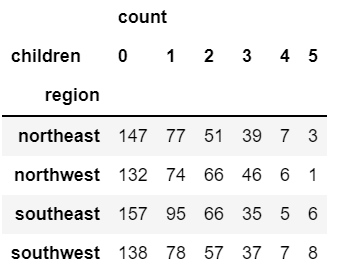

In [56]:
df_1 = pd.crosstab(df['region'], df['children'])
df_1

children,0,1,2,3,4,5
region,,,,,,
northeast,147,77,51,39,7,3
northwest,131,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- From the above dataframe, create a new feature 'Total' from the above dataframe df_1
- Create one more feature Average, and calculate row wise mean() as in figure
- Follow the below image for hints:
- Use sum() function and axis=1 in it.
</pre>
</p>
</span>
</div>

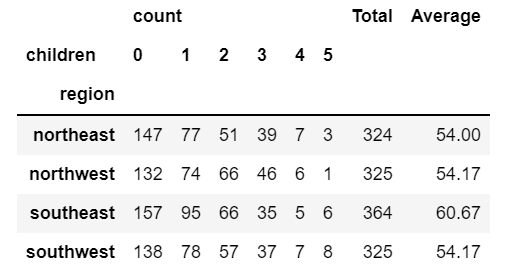

In [57]:
# Creating 'Total' feature by summing the counts of children categories across columns
df_1['Total'] = df_1.sum(axis=1)

# Creating 'Average' feature by calculating the row-wise mean of counts (excluding the 'Total' column)
df_1['Average'] = round(df_1.drop(columns=['Total']).sum(axis=1) / df_1.drop(columns=['Total']).count(axis=1),2)

# Display the updated DataFrame with 'Total' and 'Average' features
df_1


children,0,1,2,3,4,5,Total,Average
region,,,,,,,,
northeast,147,77,51,39,7,3,324,54.00
northwest,131,74,66,46,6,1,324,54.00
southeast,157,95,66,35,5,6,364,60.67
southwest,138,78,57,37,7,8,325,54.17


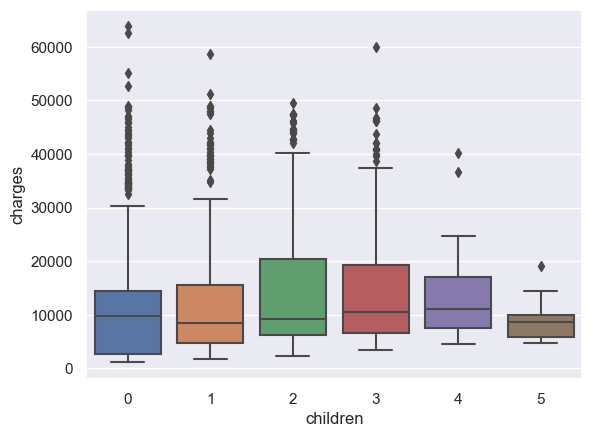

In [58]:
sns.boxplot(data=df,x='children',y='charges');

- Charges showing a slighlty inverse relationship with number of childrens
- 0 children group paying high price , and as the number of children goes up the charge comes down
- Might be an important feature for prediction of insurance price.

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'region' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plots w.r.t 'region feature
</pre>
</p>
</span>
</div>

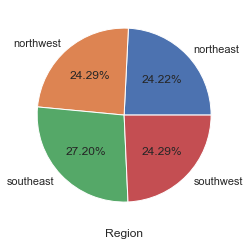

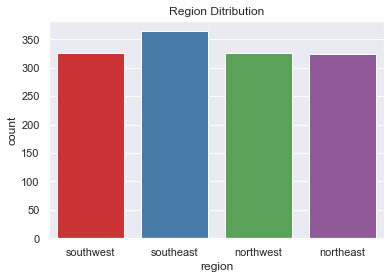

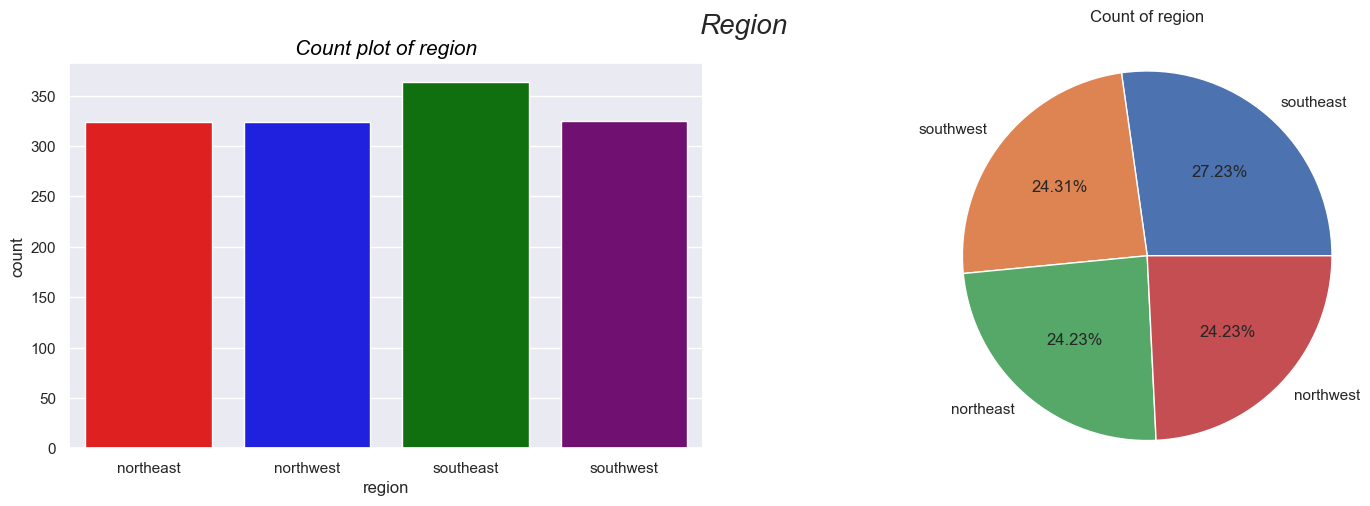

In [59]:
column = 'region'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Region',fontsize=20,fontstyle='oblique')

custom_palette = ['red', 'blue', 'green', 'purple']

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df,palette=custom_palette)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}'.format(column),pad=30)
plt.show()

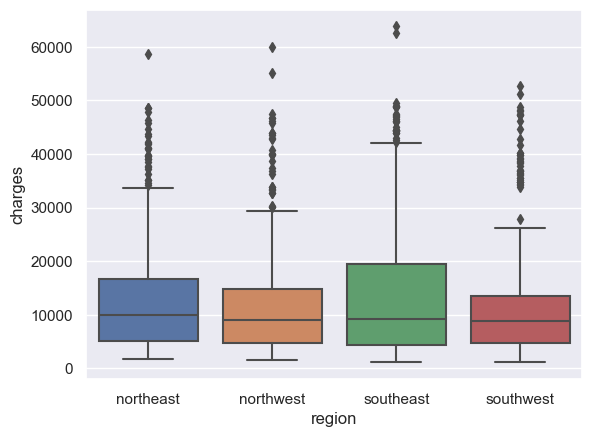

In [60]:
sns.boxplot(data=df,x='region',y='charges');

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'charges' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create charges mean based on direction using pandas.pivot_table()
</pre>
</p>
</span>
</div>

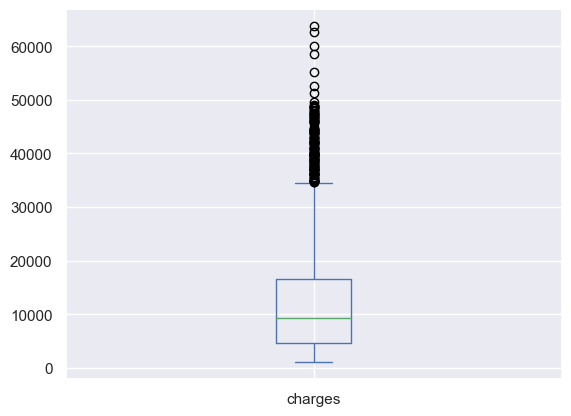

In [61]:
#Boxplot for charges
df['charges'].plot(kind='box');

- We have seen earlier 'charges' column contains outliers or high charges due to some factors and that's why we normalised it also, to perform ANOVA.

In [62]:
# Creating a pivot table to calculate the mean of 'charges' based on 'direction'
pivot_table_result = pd.pivot_table(df, values='charges', index='region', aggfunc='mean')

# Display the resulting pivot table
print(pivot_table_result)

                charges
region                 
northeast  13406.384516
northwest  12450.840844
southeast  14735.411438
southwest  12346.937377


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- How many people got billed above 15000 in insurance? What percentage of total amount do they contribute to?
</pre>
</p>
</span>
</div>

In [63]:
charges_above_15k=df[df['charges']>15000]
Bill_15=charges_above_15k['charges'].sum()
Total_Charge=df['charges'].sum()
Percent=((Bill_15/Total_Charge)*100).round(3)

In [64]:
print(f'Number of people got billed above 15000 :{len(charges_above_15k)}')
print(f'Percentage of total amount these {len(charges_above_15k)} contributed :{Percent}% '  )

Number of people got billed above 15000 :358
Percentage of total amount these 358 contributed :60.751% 


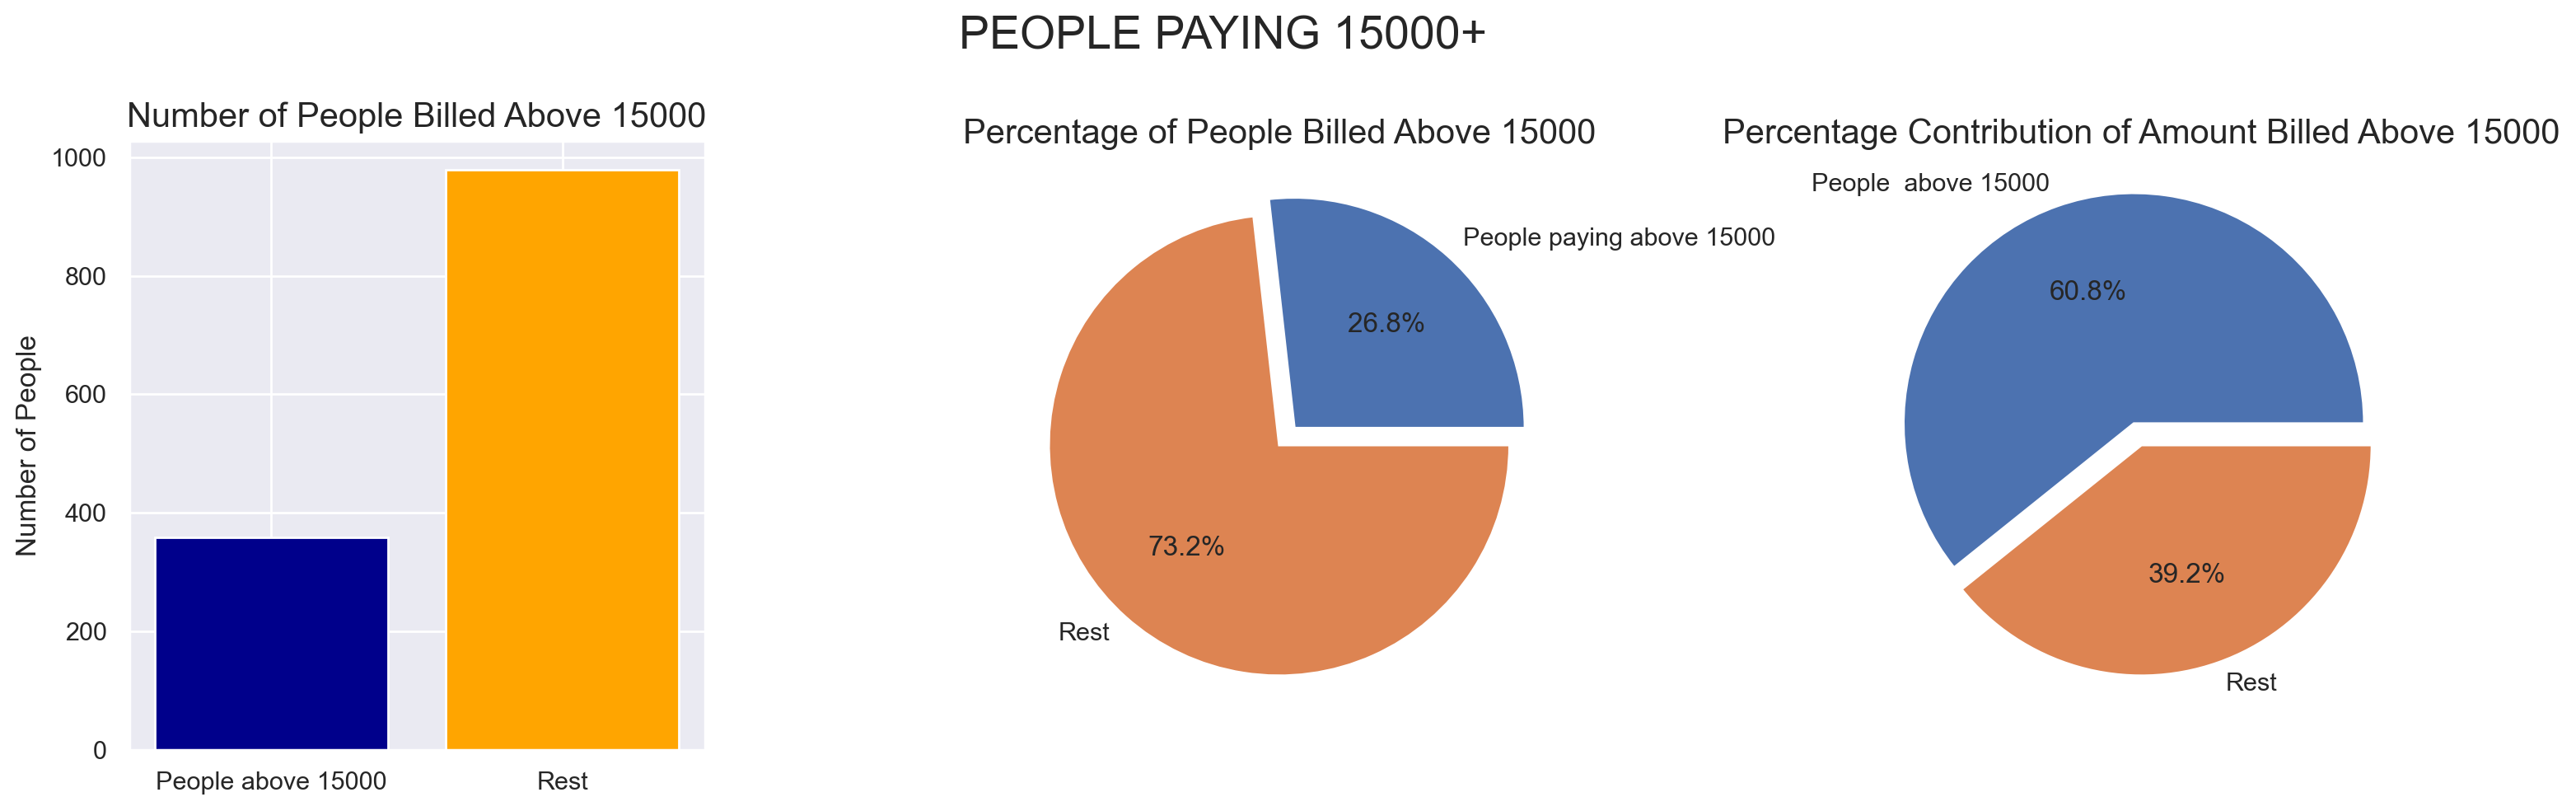

In [122]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Set the main title
fig.suptitle('People paying 15000+'.upper(), fontsize=20)

# Plot 1: Bar Plot
categories_bar = ['People above 15000', 'Rest']
counts_bar = [len(charges_above_15k), len(df) - len(charges_above_15k)]
axes[0].bar(categories_bar, counts_bar, color=['darkblue', 'orange'])
axes[0].set_ylabel('Number of People')
axes[0].set_title('Number of People Billed Above 15000',fontsize=15)

# Plot 2: Pie Chart (Number of People)
categories_pie1 = ['People paying above 15000', 'Rest']
sizes_pie1 = [len(charges_above_15k), len(df) - len(charges_above_15k)]
explode_pie1 = (0.1, 0)
axes[1].pie(sizes_pie1, explode=explode_pie1, labels=categories_pie1, autopct='%1.1f%%')
axes[1].set_title('Percentage of People Billed Above 15000',fontsize=15)

# Plot 3: Pie Chart (Percentage Contribution)
categories_pie2 = ['People  above 15000', 'Rest']
sizes_pie2 = [Bill_15, Total_Charge - Bill_15]
explode_pie2 = (0.1, 0)
axes[2].pie(sizes_pie2, explode=explode_pie2, labels=categories_pie2, autopct='%1.1f%%')
axes[2].set_title('Percentage Contribution of Amount Billed Above 15000',fontsize=15)

plt.tight_layout()
plt.show()


- How insightful, 26.8% people  are paying 60.8% bill amount.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is maximum charges billed by health insurance and to whom(Index)?
</pre>
</p>
</span>
</div>

In [66]:
print(f'Maximum charges billed by health insurance is {df["charges"].max()} to Index number {df["charges"].idxmax() }  \n ')
print(f'Details of Index number {df["charges"].idxmax() }:\n\n{df.loc[543]}')

Maximum charges billed by health insurance is 63770.42801 to Index number 543  
 
Details of Index number 543:

age                           54
sex                       female
bmi                        47.41
children                       0
smoker                       yes
region                 southeast
charges              63770.42801
age_group                  50-60
age_grp_encode                 4
sex_encoded                    0
smoker_encoded                 1
BMI_group         Severely_Obese
normal_charges         11.063045
Name: 543, dtype: object


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Which age group paid the highest charges by total? 
</pre>
</p>
</span>
</div>

In [67]:
result = df['charges'].groupby(df['age_group']).sum().sort_values(ascending=False).head(1)

# Extracting the age group and the corresponding total charges
age_group = result.index[0]
total_charges = result.iloc[0]

# Converting total charges from scientific notation to standard decimal notation using format()
formatted_charges = format(total_charges, '.2f')

# Print the age group and total charges in standard decimal notation
print(f"Age Group: {age_group}, has paid highest charges by Total,which is : {formatted_charges}")


Age Group: 50-60, has paid highest charges by Total,which is : 4521507.58


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- The below image shows the charges distribution of smoker(red: non-smoker, green:smoker)
- Plot a histogram for charges classifying both smokers and non-smokers (Consider your convenient axes scale)
- Find areas from your plot, where given a new charge, probability of a smoker is higher than a non-smoker
- For example, from the plot if a charge 32000 is estimated, the probability of non-smoker is higher than a smoker.
- After performing this, Kindly frame a conclusion if this is a good feature to consider or not. 
</pre>
</p>
</span>
</div>

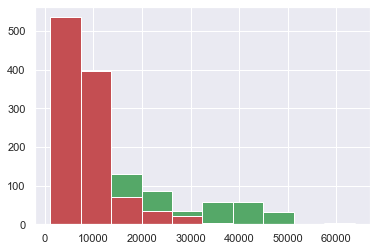

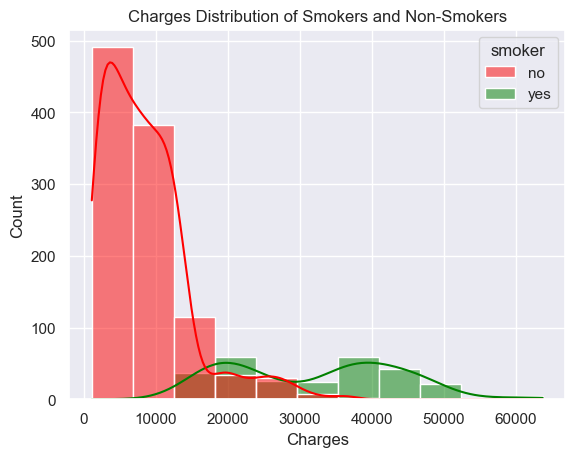

In [68]:
# Plot histogram for charges based on smoker status
sns.histplot(data=df, x='charges', hue='smoker', bins=11, palette={'yes': 'green', 'no': 'red'},kde=True)
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Charges Distribution of Smokers and Non-Smokers')

plt.show()


- If the charge is greater than 20000 ,the probability of smoker is higher than non smoker with some exceptions.
- And if the charge is greater 30000 ,we can say with full confidence that heis a smoker.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Repeat the above similar process replacing smoker by sex. Give your insights. 
</pre>
</p>
</span>
</div>

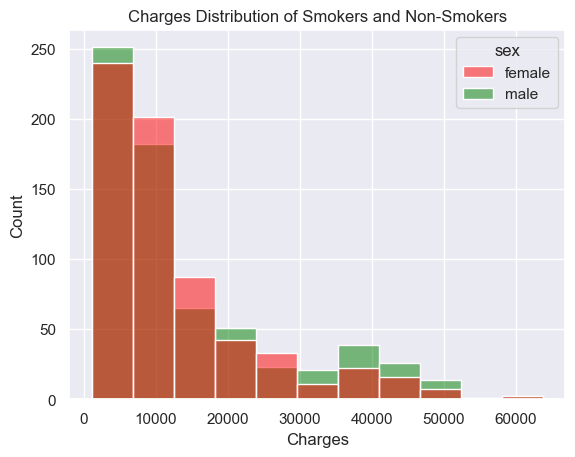

In [69]:
# Plot histogram for charges based on gender
sns.histplot(data=df, x='charges', hue='sex', bins=11, palette={'male': 'green', 'female': 'red'})
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Charges Distribution of Smokers and Non-Smokers')
plt.show()

- Sex is not a very distinguishing feature with respect to charge.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Calculate correlation using corr() function and plot a heatmap for the correlation and use palette = 'viridis'
</pre>
</p>
</span>
</div>

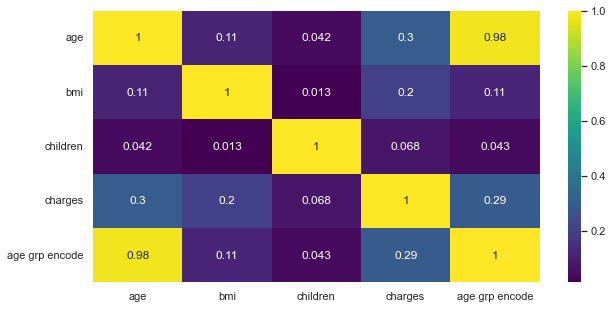

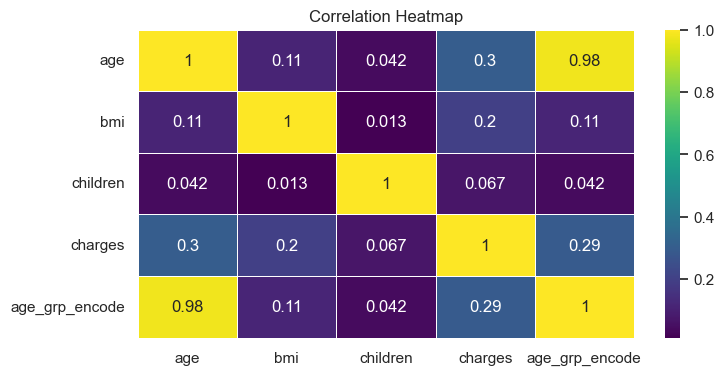

In [70]:

correlation_matrix = df[['age','bmi','children','charges','age_grp_encode']].corr()

# Plotting heatmap for correlation matrix with 'viridis' color palette
plt.figure(figsize=(8, 4))
sns.heatmap(data=correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

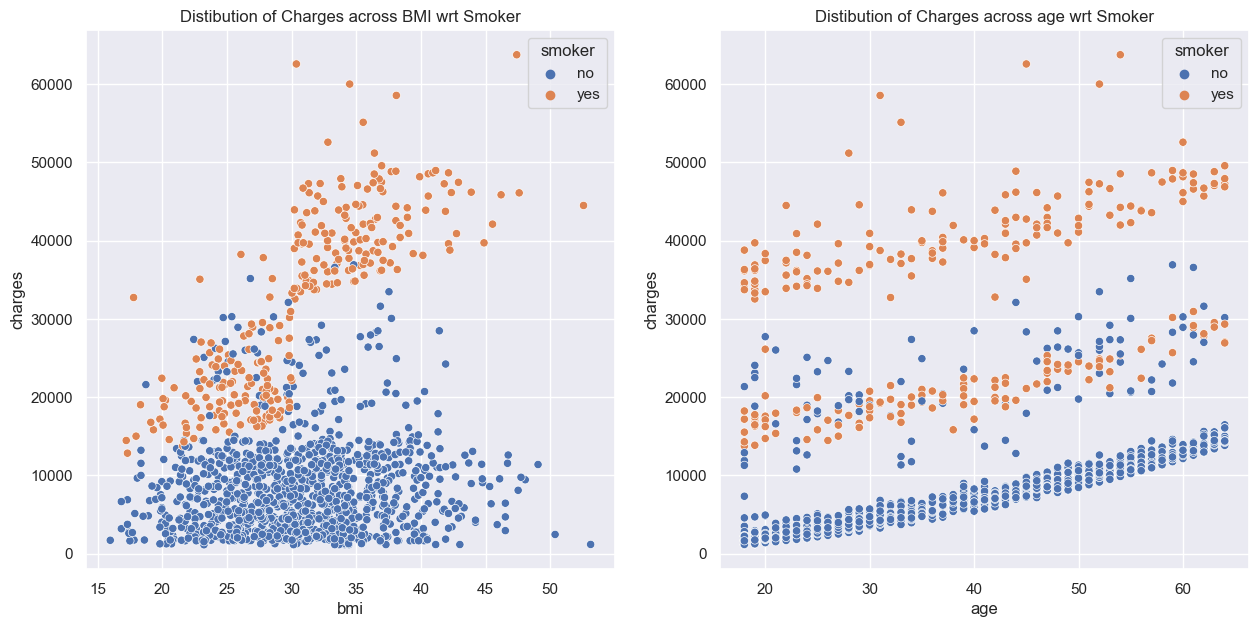

In [71]:
#Analysis of Smoker with respect to other columns.
fig,axes=plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker',ax=axes[0]);
sns.scatterplot(data=df,x='age',y='charges',hue='smoker',ax=axes[1]);

axes[0].set_title('Distibution of Charges across BMI wrt Smoker')
axes[1].set_title('Distibution of Charges across age wrt Smoker')

plt.show()

- Those who are smokers with a BMI of 30+ are paying high price for insurance.
- Irrespective of the age ,if the person is smoker he is paying more than non-smoker.
- There are some datapoints which are showing exceptions ,some of the non smokers people in healthy BMI category ,are paying high charges , so we have to study them seperately. 

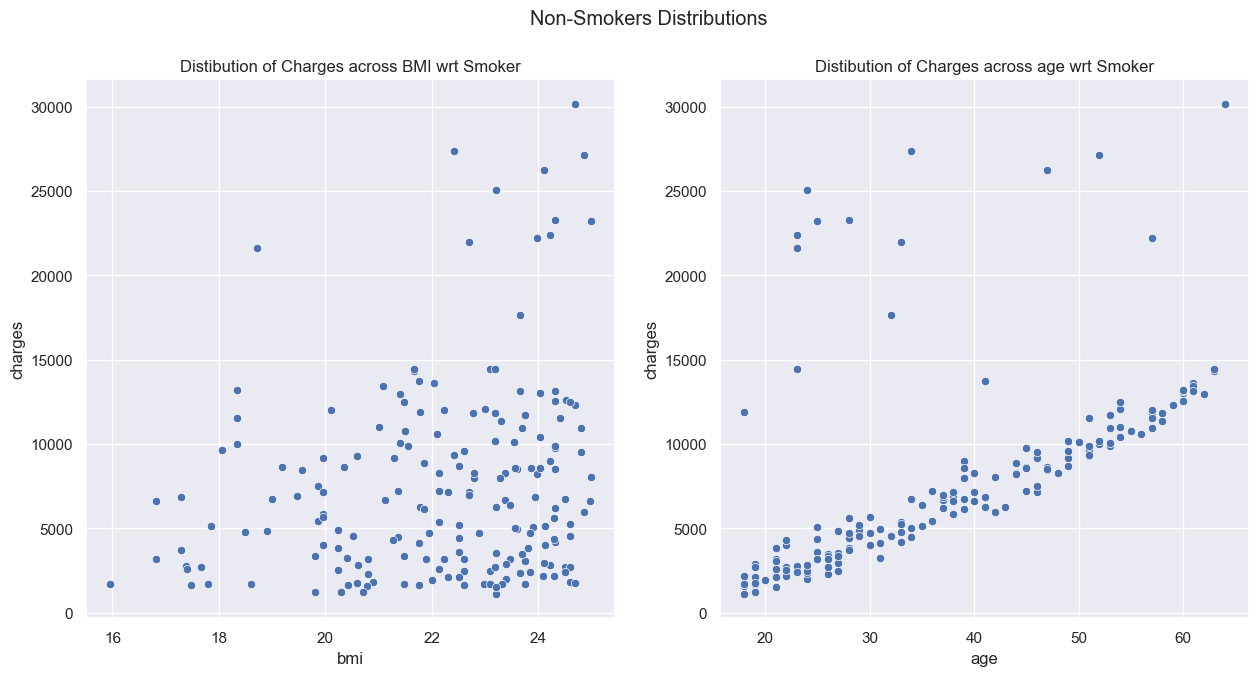

In [72]:
#Filtering the non-smokers with healthy bmi(less than 25):
age_smoker_bmi=df[(df['smoker']=='no') & (df['bmi']<25)]

#Analysis of Smoker with respect to other columns.
fig,axes=plt.subplots(1,2,figsize=(15,7))
fig.suptitle("Non-Smokers Distributions")
sns.scatterplot(data=age_smoker_bmi,x='bmi',y='charges',ax=axes[0]);
sns.scatterplot(data=age_smoker_bmi,x='age',y='charges',ax=axes[1]);

axes[0].set_title('Distibution of Charges across BMI wrt Smoker')
axes[1].set_title('Distibution of Charges across age wrt Smoker')

plt.show()

**Observation :**
- After filtering out **Smokers** with **High BMI** , most of the high insurance prices are gone ,implying that BMI  is also important in figuring out Insurance Prices. 
- **Smoker** and **BMI** affects Insurance Prices.
- Now the outliers are just few datapoints,countable on fingers.
- Let's understand these outliers for Non-Smokers and low BMI people .


In [73]:
#Calculation Quartiles 
Q3 = np.percentile(df[df['smoker'] == 'no']['charges'], 75)
Q1= np.percentile(df[df['smoker'] == 'no']['charges'], 25)
IQR=Q3-Q1
ub=round(Q3+1.5*IQR)


In [74]:
#Filtering the non-smokers with healthy bmi(less than 25):
non_smoker_outlier=df[(df['smoker']=='no') & (df['bmi']<25) & (df['charges']>ub)]
non_smoker_outlier

,age,sex,bmi,children,smoker,region,charges,age_group,age_grp_encode,sex_encoded,smoker_encoded,BMI_group,normal_charges
62,64,male,24.700,1,no,northwest,30166.61817,>60,5,1,0,Healthy_weight,10.314491
140,34,male,22.420,2,no,northeast,27375.90478,30-40,2,1,0,Healthy_weight,10.217419
219,24,female,23.210,0,no,southeast,25081.76784,20-30,1,0,0,Healthy_weight,10.129896
468,28,female,24.320,1,no,northeast,23288.92840,20-30,1,0,0,Healthy_weight,10.055733
688,47,female,24.100,1,no,southwest,26236.57997,40-50,3,0,0,Healthy_weight,10.174910
1008,25,male,24.985,2,no,northeast,23241.47453,20-30,1,1,0,Healthy_weight,10.053694
1142,52,female,24.860,0,no,southeast,27117.99378,50-60,4,0,0,Healthy_weight,10.207953


- In above records ,except non-smoker+low bmi ,nothing is common ,and the charge from these people is not justified considering the previous analysis of all the features.
- So these records are pure Outliers with no basis or justification ,so we'll drop these records.

In [75]:
outlier_indices = pd.concat([bmi_outliers, non_smoker_outlier]).index

df1 = df.drop(df.index[outlier_indices])
df1.shape

(1321, 13)

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- A family is requesting you to estimate the price for the insurance given: 
    condition-1: There are 4 people in family, They are no smokers in the family.
    condition-2: They have 2 children with them aged 14 and 17
    condition-3: Four people in the family, Father aged 42 and mother aged 40. 
    Based on the information above, Show them the data that is approximately similar (needn't be exact) to this family. 
    Collectively, what can be the insurance price collectively to be paid by the family? 
</pre>
</p>
</span>
</div>

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-II </p> </span> </div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to build a model for prediction. Before that, Encode all the categorical features to train the model. 
Hints: Use pandas.replace() or pandas.map() to encode the variables
You can also use LabelEncoder to label the data. 
You can also pandas.get_dummies() to segregate the categorical data. 
</pre>
</p>
</span>
</div>

In [76]:
df1

,age,sex,bmi,children,smoker,region,charges,age_group,age_grp_encode,sex_encoded,smoker_encoded,BMI_group,normal_charges
0,19,female,27.900,0,yes,southwest,16884.92400,10-20,0,0,1,Overweight,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,10-20,0,1,0,Obese,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,20-30,1,1,0,Obese,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,30-40,2,1,0,Healthy_weight,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,30-40,2,1,0,Overweight,8.260197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,40-50,3,1,0,Obese,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,10-20,0,0,0,Obese,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,10-20,0,0,0,Obese,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,20-30,1,0,0,Overweight,7.604867


In [77]:
df1['region_encoded'] = encoder.fit_transform(df1['region'])
df1

,age,sex,bmi,children,smoker,region,charges,age_group,age_grp_encode,sex_encoded,smoker_encoded,BMI_group,normal_charges,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,10-20,0,0,1,Overweight,9.734176,3
1,18,male,33.770,1,no,southeast,1725.55230,10-20,0,1,0,Obese,7.453302,2
2,28,male,33.000,3,no,southeast,4449.46200,20-30,1,1,0,Obese,8.400538,2
3,33,male,22.705,0,no,northwest,21984.47061,30-40,2,1,0,Healthy_weight,9.998092,1
4,32,male,28.880,0,no,northwest,3866.85520,30-40,2,1,0,Overweight,8.260197,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,40-50,3,1,0,Obese,9.268661,1
1334,18,female,31.920,0,no,northeast,2205.98080,10-20,0,0,0,Obese,7.698927,0
1335,18,female,36.850,0,no,southeast,1629.83350,10-20,0,0,0,Obese,7.396233,2
1336,21,female,25.800,0,no,southwest,2007.94500,20-30,1,0,0,Overweight,7.604867,3


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Remove unnecessary features. 
</pre>
</p>
</span>
</div>

In [78]:
#Dropping object columns as well other columns ,created for Analysis purpose
df2=df1.drop(['sex','smoker','region','age_group','age_grp_encode','BMI_group','charges'],axis=1)

In [79]:
df2

,age,bmi,children,sex_encoded,smoker_encoded,normal_charges,region_encoded
0,19,27.900,0,0,1,9.734176,3
1,18,33.770,1,1,0,7.453302,2
2,28,33.000,3,1,0,8.400538,2
3,33,22.705,0,1,0,9.998092,1
4,32,28.880,0,1,0,8.260197,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,9.268661,1
1334,18,31.920,0,0,0,7.698927,0
1335,18,36.850,0,0,0,7.396233,2
1336,21,25.800,0,0,0,7.604867,3


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Split the data into train data and test data using train_test_split() in the ratio 4:1
</pre>
</p>
</span>
</div>

In [80]:
#Seperating the input feature and output feature 
X=df2.drop('normal_charges',axis=1)
y=df2['normal_charges']
y.shape

(1321,)

In [81]:
# Applying train_test_split for splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('Train size: ',X_train.shape,y_train.shape)
print('Test size: ',X_test.shape,y_test.shape)

Train size:  (1056, 6) (1056,)
Test size:  (265, 6) (265,)


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to scale the numerical features. 
You can use any scalers. Standard Scaler, Minmax scaler, Robust Scaler. Mention the reasons. 
</pre>
</p>
</span>
</div>

In [82]:
#Scaling the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled_df=pd.DataFrame(X_train_scaled, columns=X.columns)
X_scaled_df.describe()

,age,bmi,children,sex_encoded,smoker_encoded,region_encoded
count,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03
mean,-6.907353e-17,-5.961141e-17,-1.076711e-16,-1.234282e-16,-2.470667e-16,-2.291938e-17
std,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00
min,-1.491576e+00,-2.441496e+00,-8.993607e-01,-1.026876e+00,-5.026620e-01,-1.367698e+00
25%,-9.241753e-01,-7.003924e-01,-8.993607e-01,-1.026876e+00,-5.026620e-01,-4.621875e-01
50%,-2.149245e-03,-4.468441e-02,-7.779936e-02,9.738272e-01,-5.026620e-01,4.433227e-01
75%,8.489517e-01,6.388060e-01,7.437619e-01,9.738272e-01,-5.026620e-01,4.433227e-01
max,1.770978e+00,3.770078e+00,3.208446e+00,9.738272e-01,1.989409e+00,1.348833e+00


- As we have dealt with outliers present in the dataset ,so we can use Standard Scaler.
- Linear regression assume that the features are normally distributed. StandardScaler can transform the features to have a standard normal distribution, meeting this assumption.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Why do you think we need to scale the features? 
</pre>
</p>
</span>
</div>

- When features are on a similar scale, the coefficients in linear models (such as linear regression) are easier to interpret. 
- **To Avoid Bias of Magnitude** - Without scaling, features with larger magnitudes might be given more weightage during the modeling process than features with smaller magnitudes. 
- Scaling ensures that all features contribute equally to the model training.
- Regularization techniques, like L1 and L2 regularization, assume that all features are on the same scale. 

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Now, the data is cleaned and preprocessed. Lets build the model using Linear Regression
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform the Linear Regression for the whole data to create a summary and understand the assumptions. Follow the steps and run the below cells. 
- Run the below cell. You need not right any code in the cells that mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [83]:
# Training the Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [84]:
# Run this cell
print(f'Coefficients: {linear_reg.coef_}')
print(f'Intercept: {linear_reg.intercept_}')
print(f'R^2 score: {linear_reg.score(X_train_scaled, y_train)}')

Coefficients: [ 0.49267189  0.07670094  0.12842304 -0.03436686  0.63092258 -0.04707183]
Intercept: 9.072063475733188
R^2 score: 0.7814864636354156


In [85]:
#Calculating prediction of test data
y_pred=linear_reg.predict(X_test_scaled)

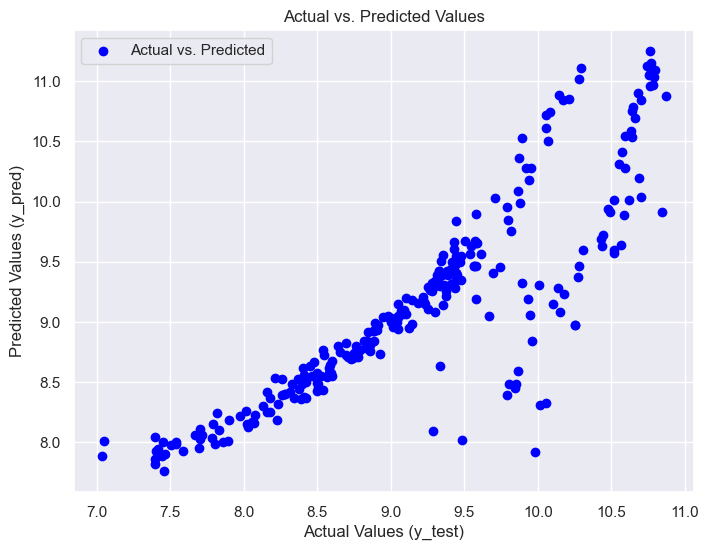

In [86]:
#Visualizing the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


##  <mark><span  style= "font-family: Times New Roman">Assumptions: </span> </mark> <a class="anchor" id="Assumptions"></a>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumptions for Linear Regression:
Lets check the extent upto where the assumptions of Linear Regression is valid:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform Ordinary least squares to understand these assumptions. 
- Run the below cell. You need not right any code in the cells that are mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [87]:
# Run this cell to understand the summary.
import statsmodels.api as sm
X_constant = sm.add_constant(X_train_scaled)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         normal_charges   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     625.3
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:15:05   Log-Likelihood:                -602.91
No. Observations:                1056   AIC:                             1220.
Df Residuals:                    1049   BIC:                             1255.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0721      0.013    686.082      0.000       9.046       9.098
x1             0.4927      0.013     37.000      0.000       0.467       0.519
x2             0.0767      0.013      5.717      0.000       0.050       0.103
x3             0.1284      0.013      9.700      0.000       0.102       0.154
x4            -0.0344      0.013     -2.588      0.010      -0.060      -0.008
x5             0.6309      0.013     47.543      0.000       0.605       0.657
x6            -0.0471      0.013     -3.523      0.000      -0.073      -0.021
==============================================================================
Omnibus:                      376.224   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1504.609
Skew:                           1.667   Prob(JB):                         0.00
Kurtosis:                       7.804   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-1 : No Autocorrelation.
From the above summary, Note the Durbin Watson value.
Durbin-Watson test is a statistical test that works for finding autocorrelation value. It lies generally between 0-4.
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Durbin watson value and Write an if statement to print:
"Positive Correlation" for value greater than 2
"Zero correlation" for value equal to 2
"Negative Correlation" for value lesser than 2
</pre>
</p>
</span>
</div>

In [88]:
#Calculation of durbin_watson_value

from statsmodels.stats.stattools import durbin_watson

durbin_watson_value = durbin_watson(lin_reg.resid)

if durbin_watson_value > 2:
    print("Positive Correlation")
elif durbin_watson_value == 2:
    print("Zero Correlation")
else:
    print("Negative Correlation")

Positive Correlation


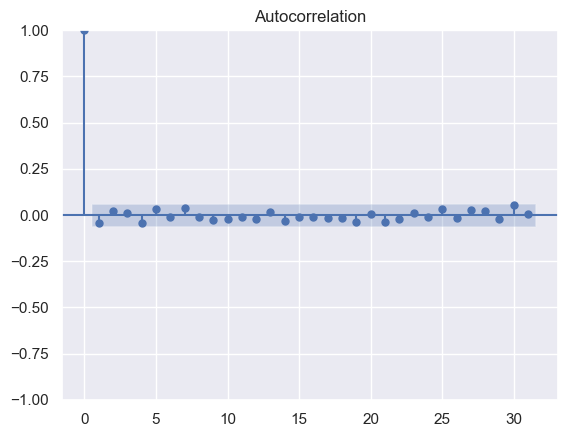

In [89]:
# Run the cell below
# this plot is called autocorrelation plot. you will be working on this later in the course.
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lin_reg.resid,alpha=0.05)
acf.show()

- Autocorrelation assumption is important for time-series data ,and since our data is not time-series data ,it's not a big issue.
- Also ,it is slightly above to 2 ,so not much concerning.

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-2 : Normality of Residuals.
From the above summary, Note the Jarque bera value.
Normality is an assumption for many statistical tests. Jarque-bera value is a test for checking normality. 
We are performing this here to check the normality for the different of actual and predicted values.
</pre>
</p>
</span>
</div>

In [90]:
residuals = lin_reg.resid

In [91]:
# Run the below cell
from scipy import stats
stats.jarque_bera(lin_reg.resid)



Jarque_beraResult(statistic=1504.6087525701432, pvalue=0.0)

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Jarque bera value and p-value as 0.05 and Write an if statement to print:
"Normal distribution" for value greater than p-value
"Non-normal distribution" for value lesser than p-value
</pre>
</p>
</span>
</div>

In [92]:
# Calculate Jarque-Bera test statistic and p-value for the residuals
jarque_bera_statistic, jarque_bera_p_value = stats.jarque_bera(lin_reg.resid)

print("Jarque-Bera Test Statistic:", jarque_bera_statistic)
print("P-Value:", jarque_bera_p_value)

# Perform the test
alpha = 0.05
if jarque_bera_p_value > alpha:
    print("Normal distribution (Fail to reject the null hypothesis)")
else:
    print("Non-normal distribution (Reject the null hypothesis)")


Jarque-Bera Test Statistic: 1504.6087525701432
P-Value: 0.0
Non-normal distribution (Reject the null hypothesis)


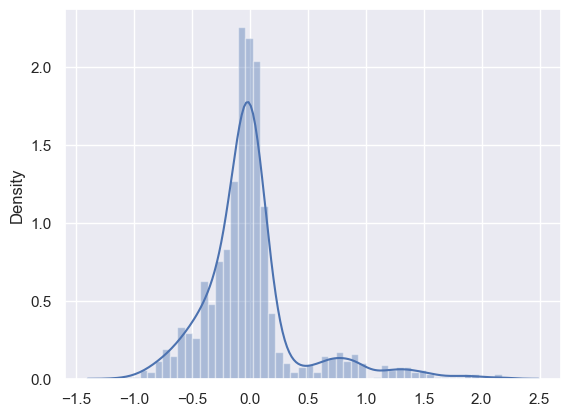

In [93]:
# Validate your above answer by running the cell
import seaborn as sns
sns.distplot(lin_reg.resid)
plt.show()

- Residuals do not follow a normal distribution according to the Jarque-Bera test. This suggests that there might be some non-normality in the data.

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Asssumption 3 - Linearity of residuals
Run the below cell to check the Linearity in the model
</pre>
</p>
</span>
</div>

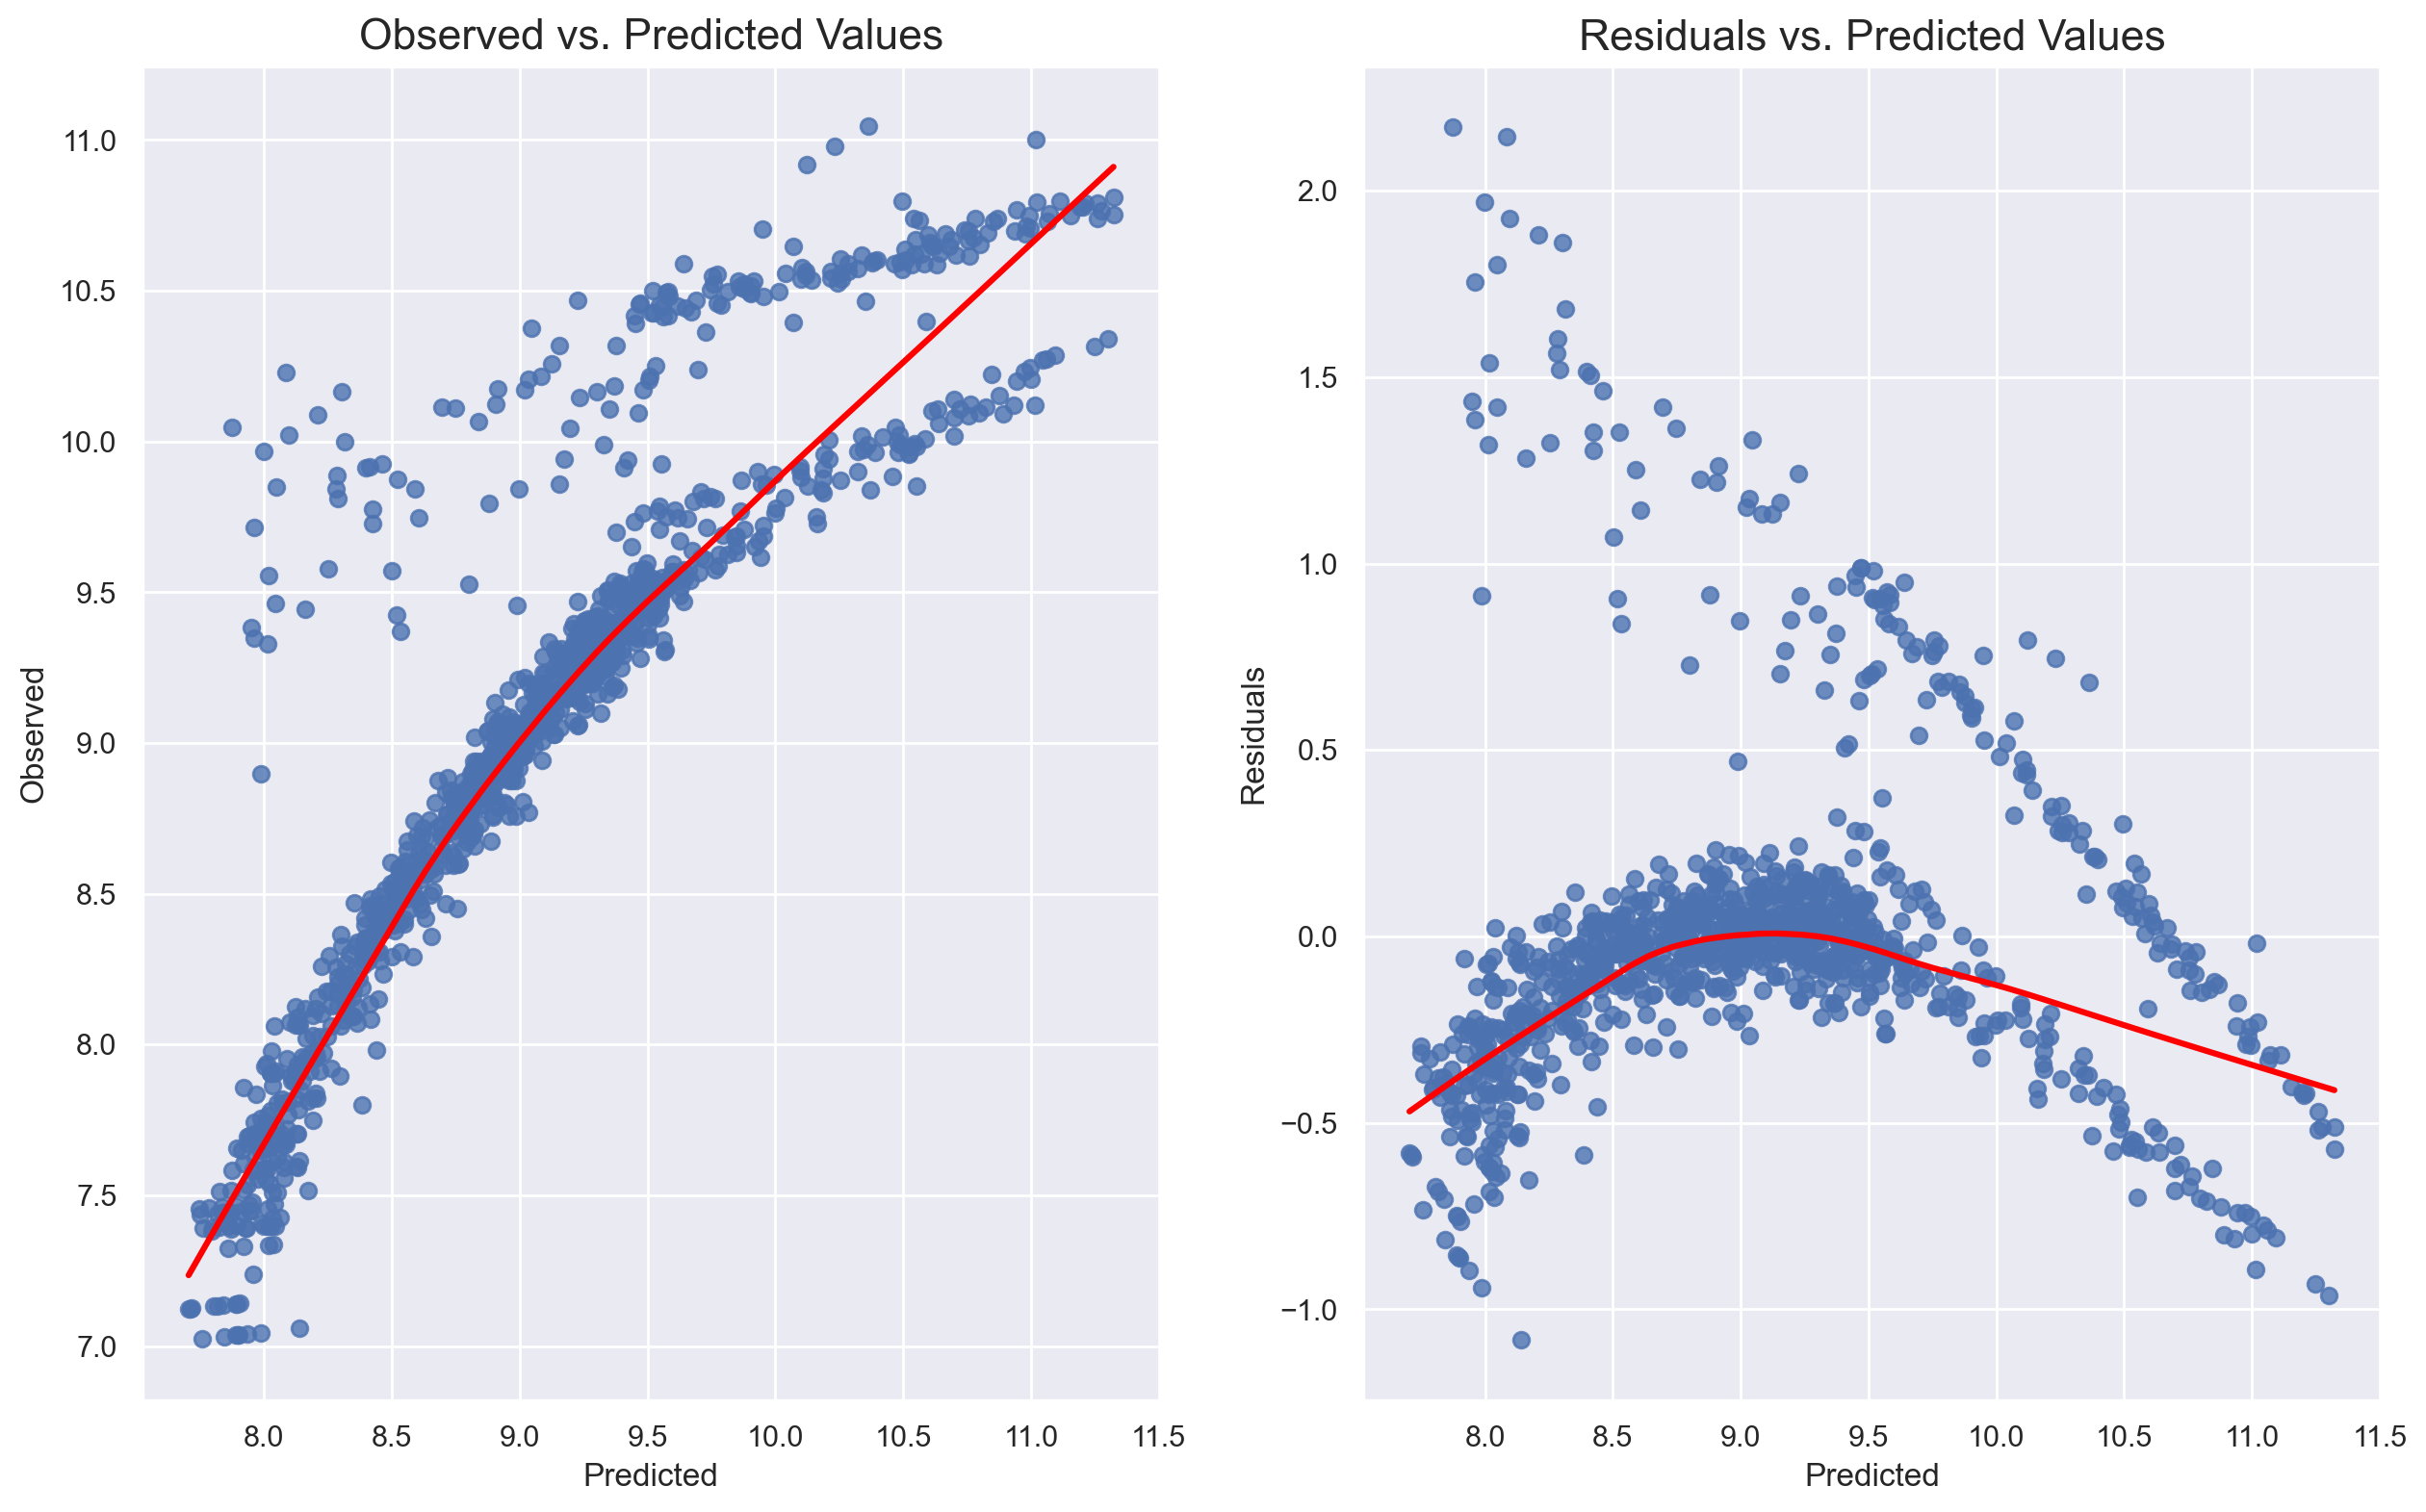

In [94]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

# function to test the linearity. Input the model(Linear Regression and the output)
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    # Finding the predictions from the model
    fit_values = model.predict()
    #Residuals 
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    # Plotting a regression plot for the above found values
    sns.regplot(x=fit_values, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y_train)  

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Run the below cell to perform Rainbow test. 
Rainbow test is performed to test linearity. Even though there is no good linearity, it can be used to achieve the linearity from a subsample data.
</pre>
</p>
</span>
</div>

In [95]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(0.9176785738250226, 0.8372893996038319)

- The p-value : 0.059490665966739666
- There is not enough evidence to reject the null hypothesis of linearity. This suggests that the relationship between the predictors and the response in your regression model can be considered linear.
- p-value is slightly above 0.05, it might be worthwhile to investigate further. 

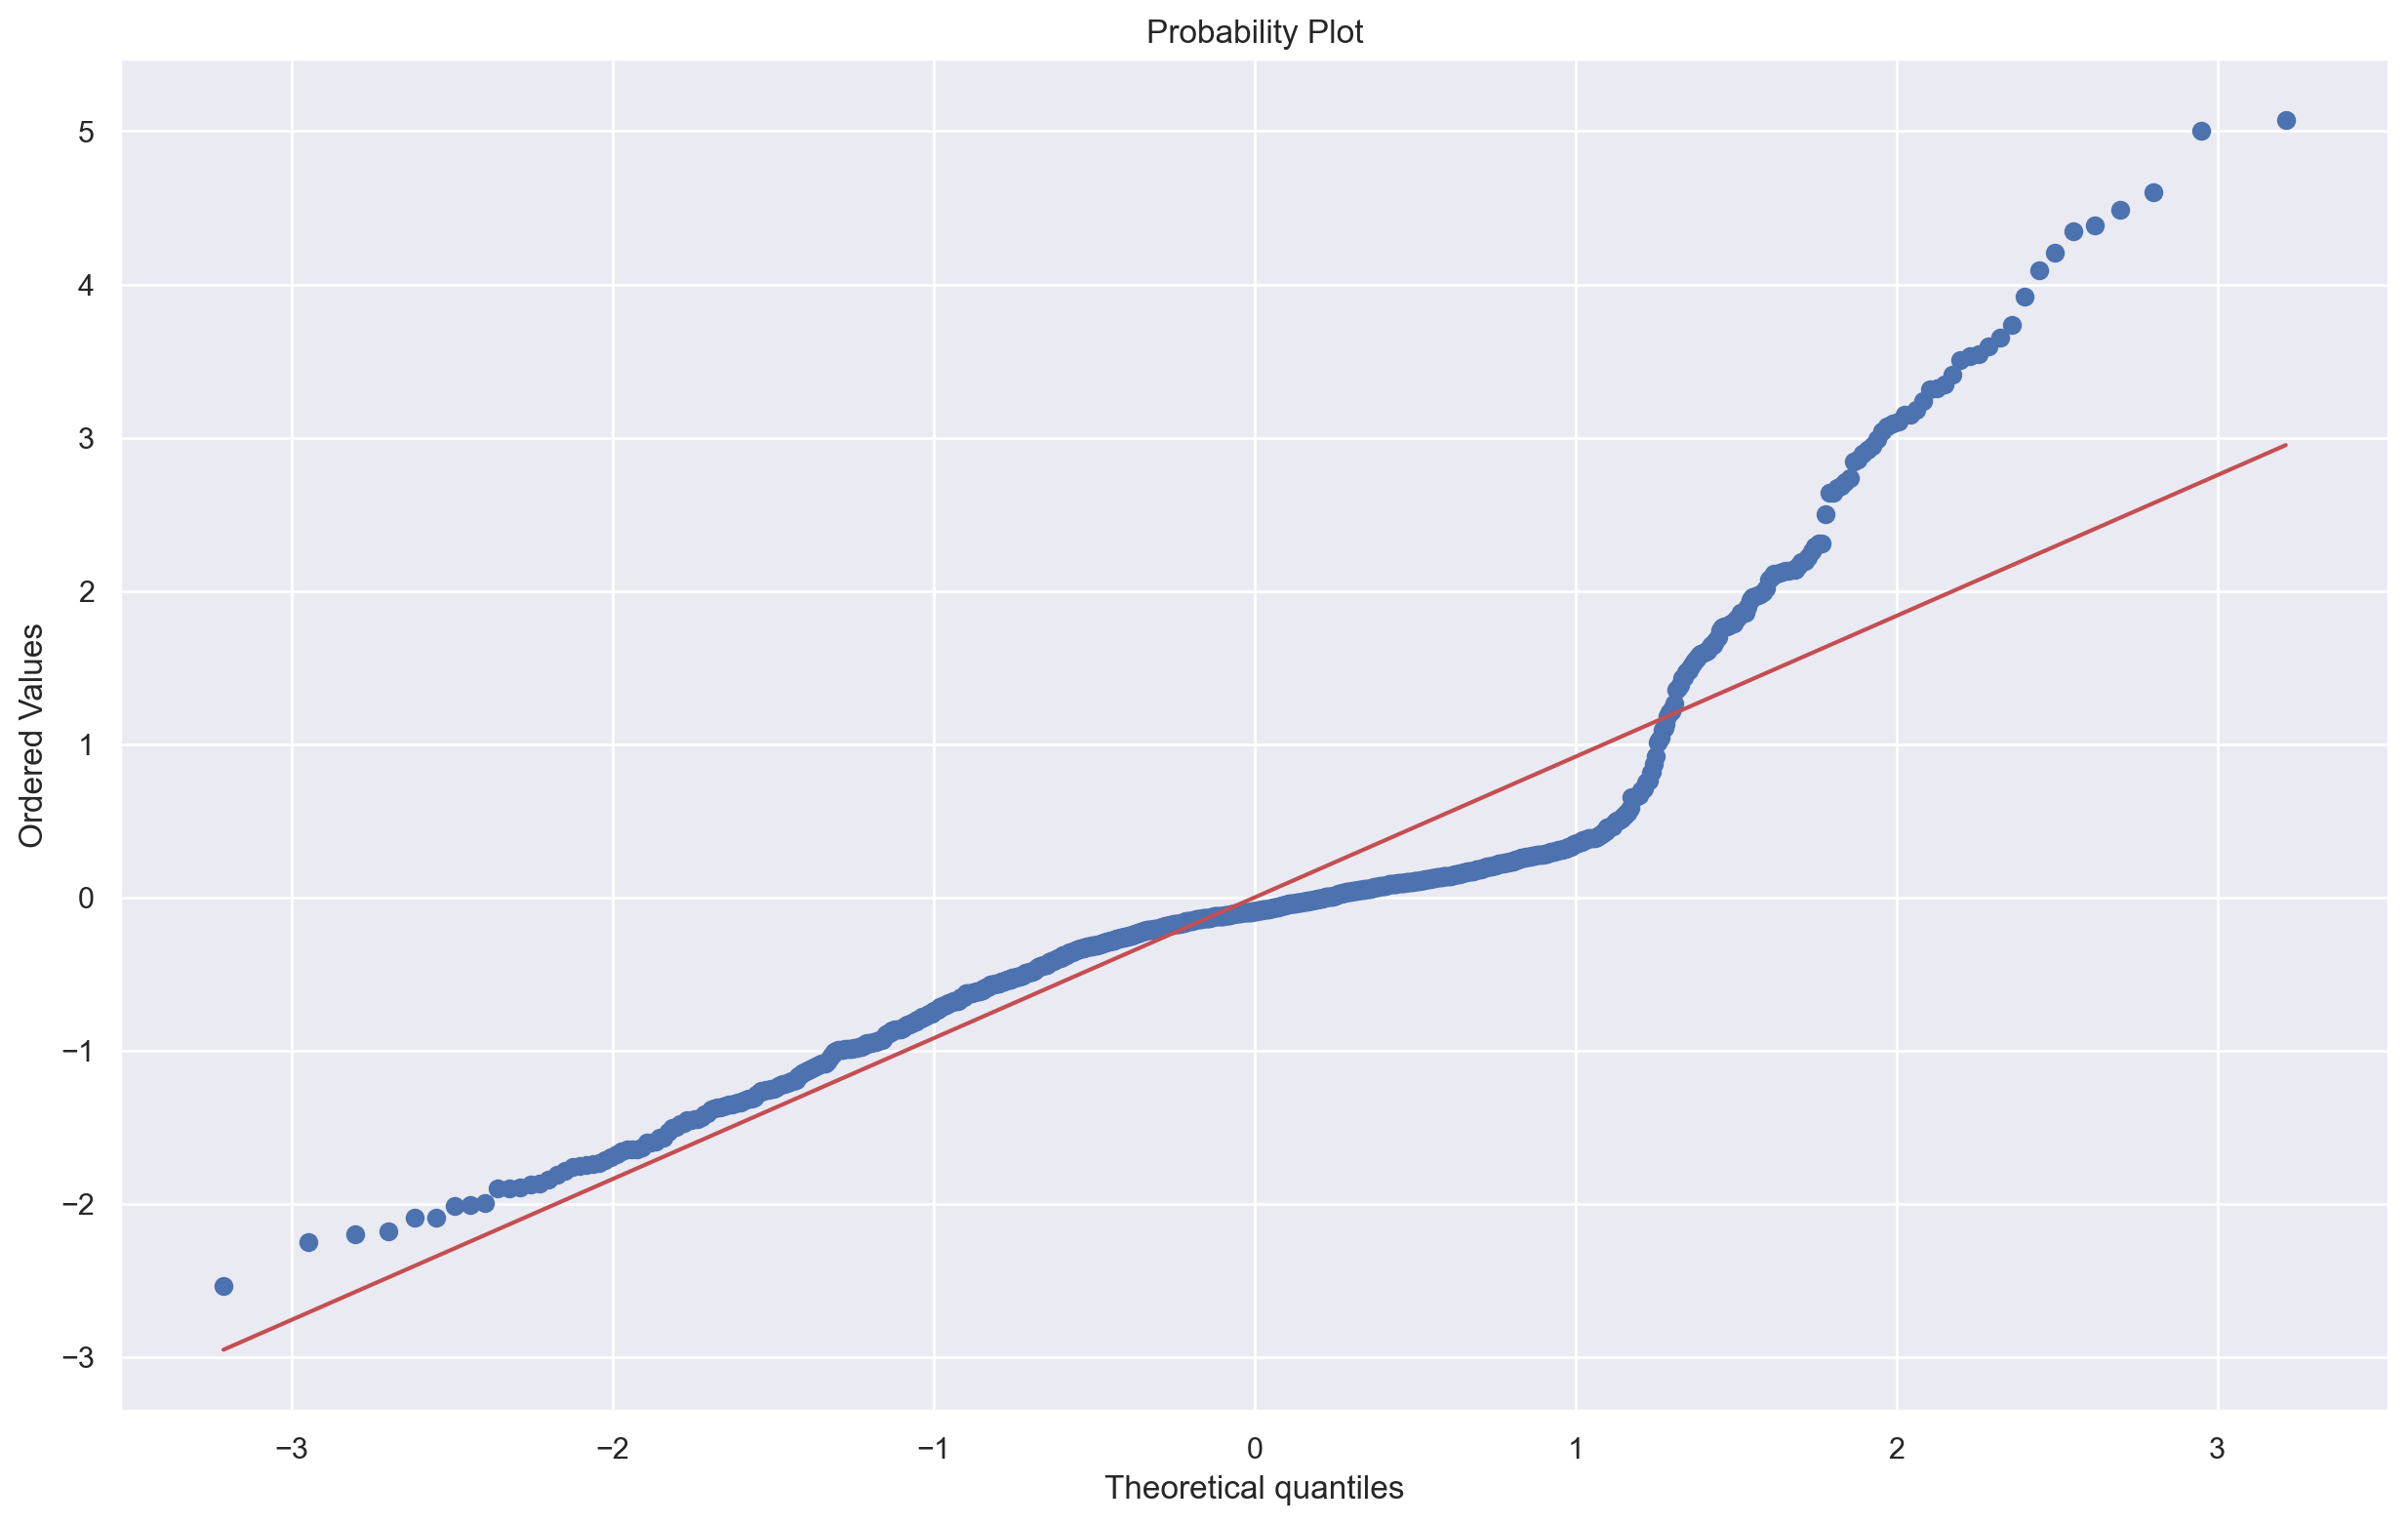

In [96]:
# Run the below cell and understand the residual distribution
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
# We are plotting studentized residuals
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [97]:
lin_reg.resid.mean()
# As the value is very much close it zero .We can say linearity is present.

-2.136338244354468e-15

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Run the below cell to check the homoscedasticity in the model
</pre>
</p>
</span>
</div>

**We are plotting the same as above plots, but for checking homoscedasticity (uniform variance)**

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'sqrt(abs(Residuals))')]

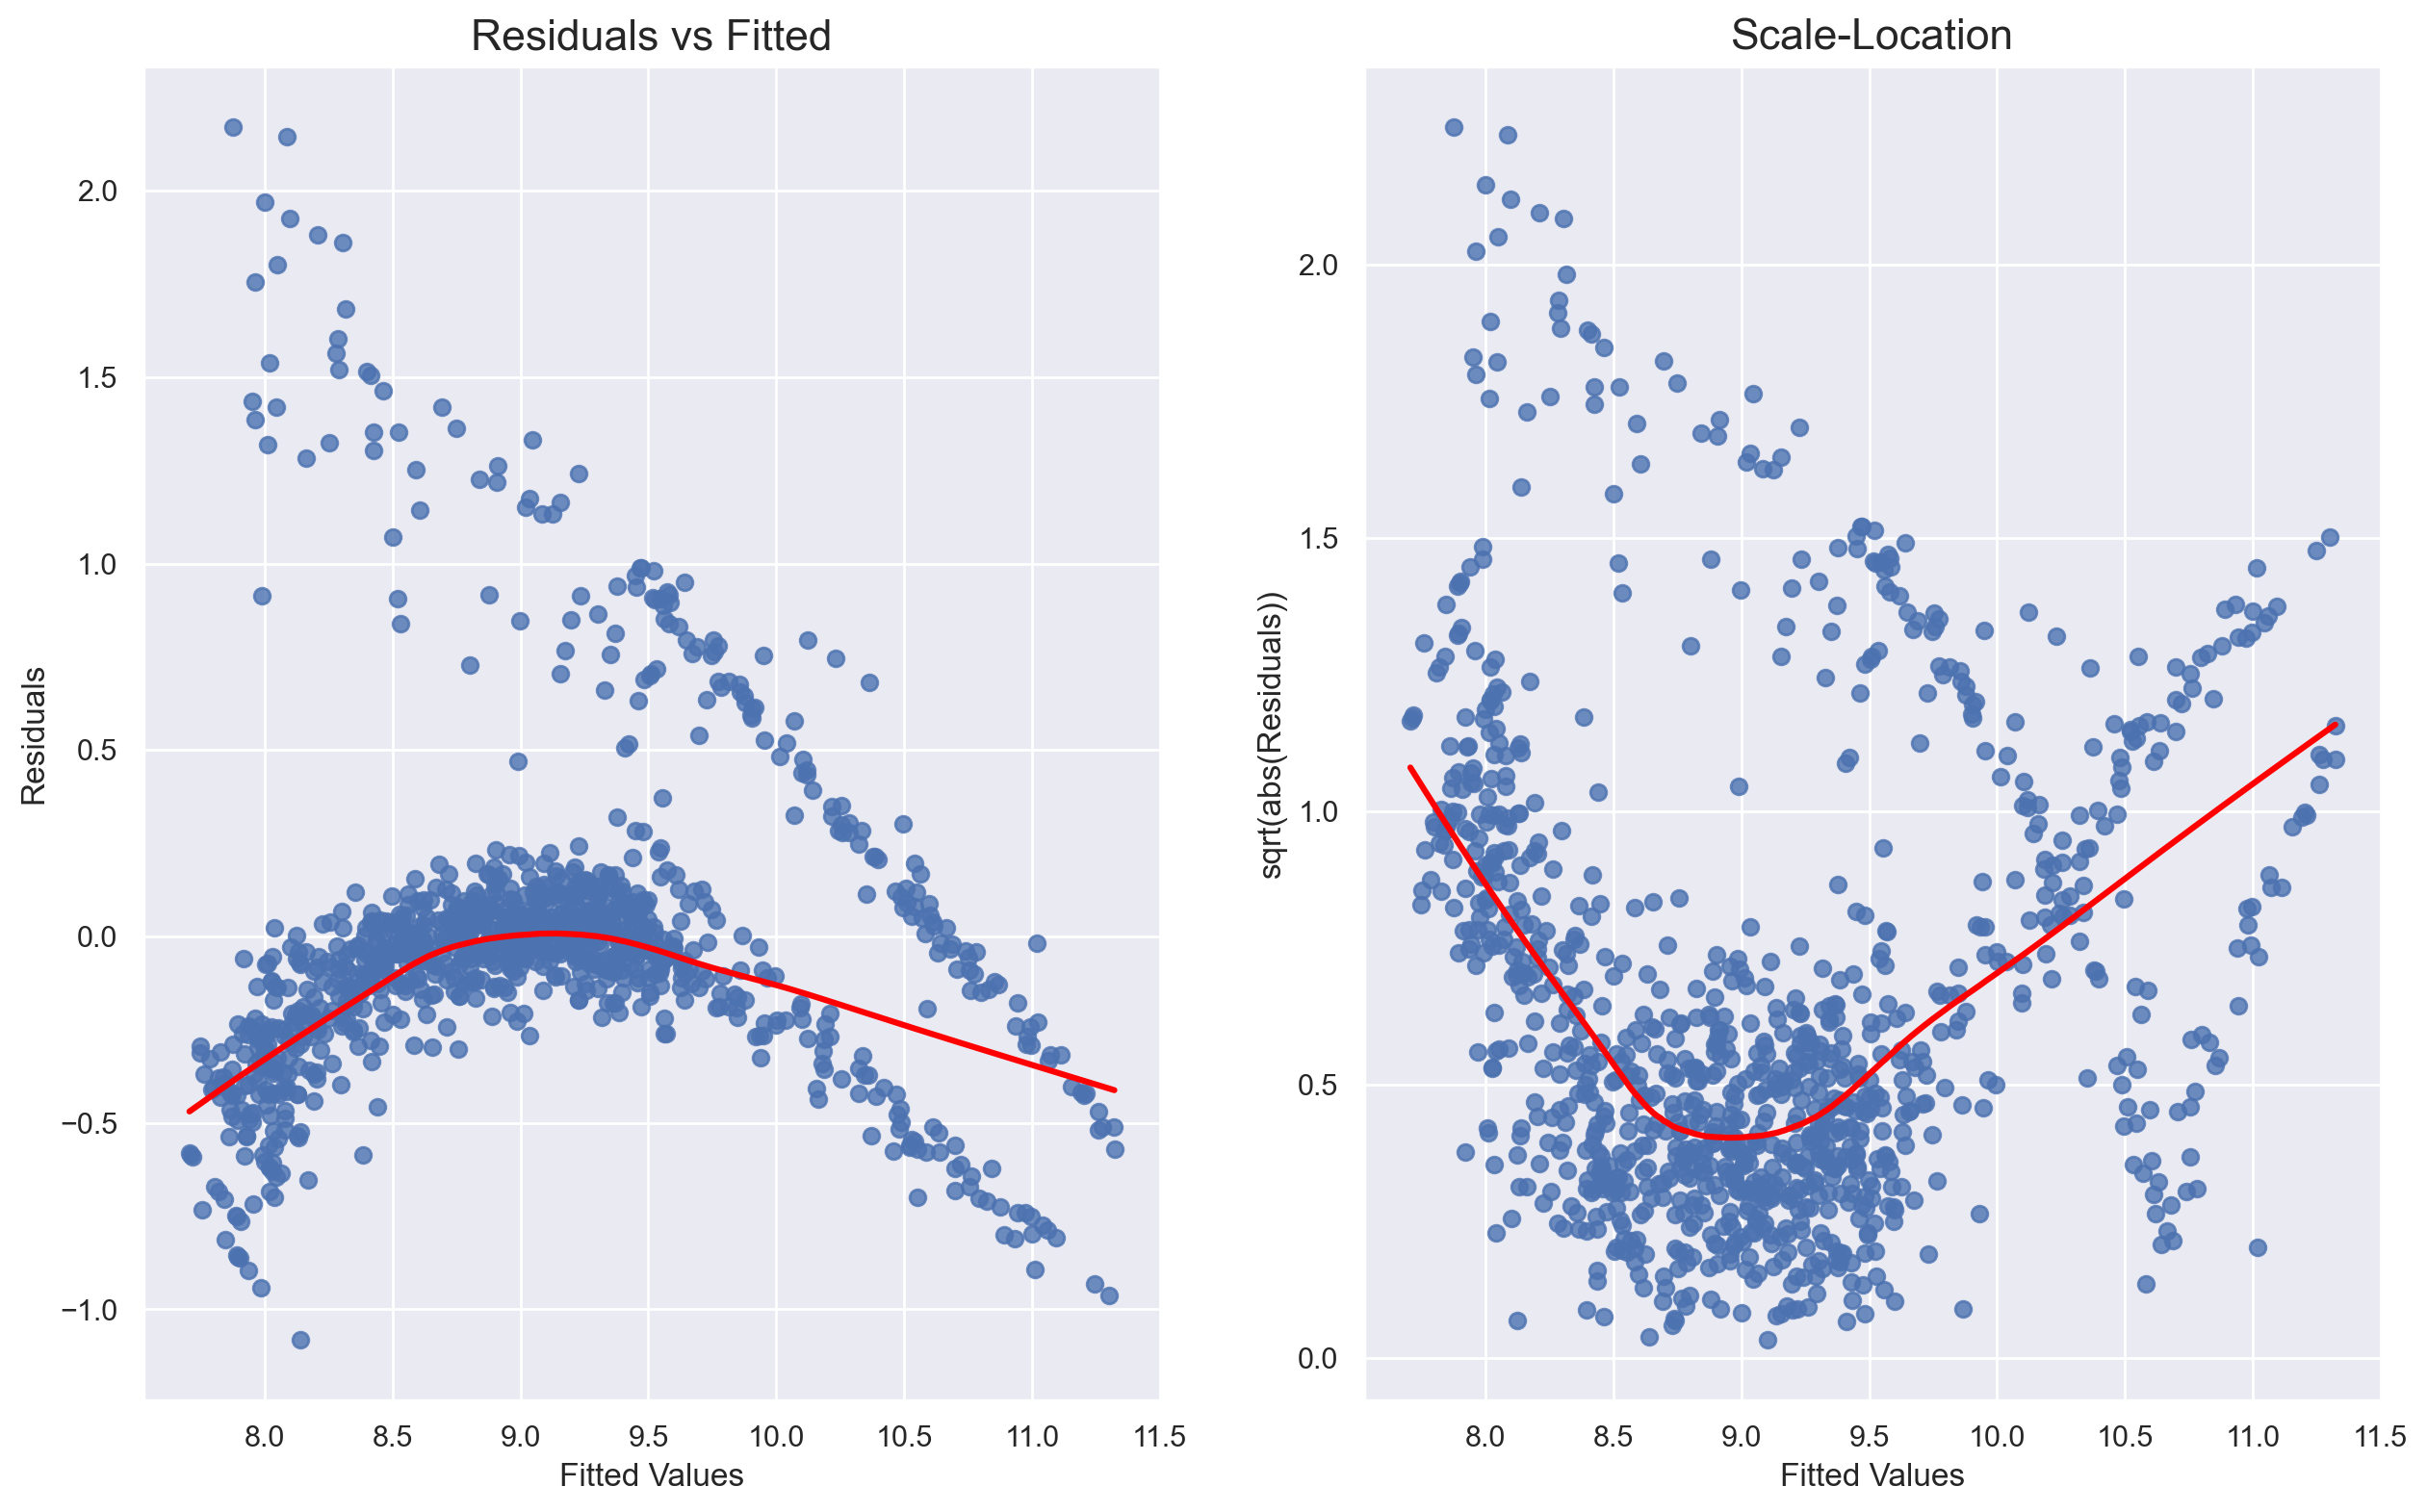

In [98]:
from statsmodels.compat import lzip
from statsmodels.compat import lzip

model = lin_reg
resids = model.resid
fit_values = model.predict()
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

# Regression plots for residual values and predicted values
sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

# Regression plots for scaled residuals and predicted values
sns.regplot(x=fit_values, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [99]:
# Goldfeld quandt test is used to check the homoscedasticity in regression analysis
# Run the below cell
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
# WE fail to reject the null hypothesis which is Homoscedasticity is present and we can continue with the original regression

[('F statistic', 1.2648878751228894), ('p-value', 0.0037093593975501796)]

In [100]:
print('p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.')

p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 5- NO MULTI COLLINEARITY
Run the below cell to check the Multicollinearity in the model
We use Variation inflation factors. The name itself says to determine the factors that inflate the variance if any additional variable is added to the regression.
</pre>
</p>
</span>
</div>

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We added this constant in summary
# The constant term is checked with every feature in the data and the measure is calculated. 
# If there is a very huge value for vif, then there might be chance of high collinearity 
# Here, there are no such high ranges, so it is fine to assume no multicollinearity and proceed with original regression.
vif = [variance_inflation_factor(X_constant, i) for i in range(X_constant.shape[1])]
pd.set_option("display.Max_columns",None)
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,age,bmi,children,sex_encoded,smoker_encoded,region_encoded
vif,1.014053,1.02946,1.002593,1.008632,1.007226,1.020795


- As all the vif are close to 1 ,implying that there is no multicollinearity in the data. 

### By now, we have completed checking the assumptions for Linear Regression. 
### Now, we are ready to build the model with train and test data and check the working of the model.

In [102]:
# As the data is split into train data and test data, Lets start the model
# Step-1: Create an instance of the Linear Regression, use fit() to fit the model to the input data
# Step-2: USe predict() and predict the output for test data

In [103]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [104]:
# Run this cell
print(f'Coefficients: {linear_reg.coef_}')
print(f'Intercept: {linear_reg.intercept_}')
print(f'R^2 score: {linear_reg.score(X_train_scaled, y_train)}')

Coefficients: [ 0.49267189  0.07670094  0.12842304 -0.03436686  0.63092258 -0.04707183]
Intercept: 9.072063475733188
R^2 score: 0.7814864636354156


In [105]:
y_pred=linear_reg.predict(X_test_scaled)

##  <mark><span  style= "font-family: Times New Roman">Evaluation metrics </span> </mark> <a class="anchor" id="Evaluation_metrics"></a>

In [106]:
# Calculate the metrics mean_absolute_error and mean_squared_error

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred).round(3)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred).round(3)
print("Mean Squared Error:", mse)


Mean Absolute Error: 0.296
Mean Squared Error: 0.22


- The MAE of approximately 0.265 indicates that, on average,  predictions are off by 0.296 units.
- The MSE of approximately 0.22 means that, on average, the squared differences between your predictions and the actual values are 0.22 units. 
- MSE penalizes larger errors more heavily than smaller errors, as it squares the differences. A lower MSE indicates better model performance in terms of both small and large errors.

In [108]:
# R square in train data
r2_train =linear_reg.score(X_train_scaled,y_train)

In [109]:
# Adjusted R square in train data
n = len(X_train_scaled)  # number of samples
k = X_train_scaled.shape[1]  # number of features
# Calculate adjusted R^2
adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - k - 1))

In [110]:
# R square in test data
r2_test = linear_reg.score(X_test_scaled,y_test)

In [111]:
# Adjusted R square in test data
n = len(X_test_scaled)  # number of samples
k = X_test_scaled.shape[1]  # number of features
# Calculate adjusted R^2
adjusted_r2_test = 1 - ((1 - r2_train) * (n - 1) / (n - k - 1))

In [112]:
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test)

R2 Score (Train): 0.7814864636354156
Adjusted R2 Score (Train): 0.780236624533235
R2 Score (Test): 0.7410388853748966
Adjusted R2 Score (Test): 0.776404753487402


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What do you infer from both r squared value and adjusted r squared value?
</pre>
</p>
</span>
</div>

- R2 score for the training data is 0.7815, meaning approximately 78.15% of the variance in the training data is explained by model,Adjusted R2 score for the training data is 0.7802, indicating that even after considering the complexity introduced by the features, model explains approximately 78.02% of the variance in the training data.
- the Adjusted R2 score for the test dataset (0.7764) is higher than the R2 score (0.7410), suggesting that the features included in the model contribute meaningfully to explaining the variance in the test data.
- This is a positive sign, indicating that the model generalizes well to unseen data and is not overfitting.

## <mark><span  style= "font-family: Times New Roman">Hyperparameter Tuning (Optional) </span> </mark> <a class="anchor" id="Hyperparameter_Tuning"></a>

In [113]:
# Hyperparameters are the parameters of the model working inside an algorithm to improve model's accuracy. 
# The below listed are hyperparameters of Linear Regression using get_params() function. 
# We are then performing the Linear Regression with several combinations using GridSearchCV.
# GridSearchCV takes the combinations and the evaluates it as a grid to identify the best performed set.

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
LinearRegression().get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [116]:
# We will use either Lasso or Ridge Regression to regularize the data, reducing the overfitting degree.
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
model = Ridge()
# We are using cross validation to reduced the biased values. 
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
space=dict()
space['solver'] = ['svd','cholesky','lsqr','sag']
space['alpha'] = [0.01,0.1,1,10]
space['fit_intercept'] = ['True','False']

# model name, space dictionary is given to analyze the combinations 
# Get the metrics list using this function -  sklearn.metrics.get_scorer_names()
# fianlly, cross validation data is given. 
search = GridSearchCV(model,space,scoring='neg_mean_squared_error',cv=cv)
result = search.fit(X_train_scaled, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.1863961230019654
Best Hyperparameters: {'alpha': 1, 'fit_intercept': 'True', 'solver': 'sag'}


In [117]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Instantiate the Ridge model with the best hyperparameters
ridge_model = Ridge(alpha=0.01, fit_intercept=False, solver='sag')

# Train the Ridge model with your full dataset (X and y)
ridge_model.fit(X_train, y_train)

# Make predictions on the same data used for training (X)
predictions = ridge_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, predictions)

# Print the R^2 score
print("R^2 Score:", r2)


R^2 Score: -1.214904147863459


In [118]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold, GridSearchCV

# Instantiate the Lasso model
model = Lasso()

# Define the parameter grid with only 'alpha' parameter
param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}

# Set up cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform grid search with cross-validation
search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=cv)
result = search.fit(X_train_scaled, y_train)

# Print the best score and best hyperparameters
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: -0.18706456777053987
Best Hyperparameters: {'alpha': 0.01}


In [119]:
#Lasso Regression

from sklearn.linear_model import Lasso

# Instantiate the Lasso model with the best hyperparameter
lasso_model = Lasso(alpha=0.01)

# Train the model with your full dataset (X and y)
lasso_model.fit(X_train_scaled, y_train)

# Now you can use the trained model to make predictions on new data
# Assuming X_new is your new data for prediction
predictions = lasso_model.predict(X_test_scaled)

# Print the predictions
#print("Predictions:", predictions)
r2 = r2_score(y_test, predictions)

# Print the R^2 score
print("R^2 Score:", r2)


R^2 Score: 0.7411486014889007


In [120]:
# The above code and explanation is given for reference. If you'd like to perform Hyperparameter tuning, Do it using Lasso Regression model. 

## <mark><span  style= "font-family: Times New Roman">Build a predictive system </span> </mark> <a class="anchor" id="Build"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Give the input data to the model - ((31,1,25.74,0,1,0)) and 
The above data has to be standardized so find (x_new = x_old-mean/std)
You need to reshape the data. So, use reshape(1,-1) and predict the price
You will get the standardized data, shift it to the usual price using x_old = x_new*std+mean
</pre>
</p>
</span>
</div>

In [121]:
#Predicting the insurance price for a new data

input_data = np.array([[31,25.74,1, 0, 1, 0]])  # Single input data point

#Using the same scaler ,as the training data to transform
standardized_data = scaler.transform(input_data) 

#Reshaping the data,
standardized_data_reshaped = standardized_data.reshape(1, -1)

#Prediction 
predicted_standardized_price =linear_reg.predict(standardized_data_reshaped)

#Transforming the price to original scale
predicted_prices_original_scale = np.exp(predicted_standardized_price).round(3)
predicted_prices_original_scale[0]
print(f'For given details , the candidate have to pay : {predicted_prices_original_scale[0]}')


For given details , the candidate have to pay : 23727.65


# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> Happy Learning!!! </p> </span> </div>